# Import Libraries


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

In [50]:
# Load the latest version
# Load the dataset
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "uciml/breast-cancer-wisconsin-data",
    "data.csv",  # The actual file path within the dataset
)

C:\Users\mirol\AppData\Local\Temp\ipykernel_23492\1127198705.py:3: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


In [51]:
print("First 5 records:", df.head())

First 5 records:          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_

# Data Preprocessing


In [52]:
print("\nDataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nDataset info:")
print(df.info())


Dataset shape: (569, 33)

Column names:
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null 

In [53]:
# Check for null values
print("\n Null values per column:")
print(df.isnull().sum())


 Null values per column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimen

In [54]:
# Percentage of missing values
print("\n Percentage of missing values per column:")
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent[missing_percent > 0])  # Only show columns with missing values


 Percentage of missing values per column:
Unnamed: 32    100.0
dtype: float64


In [55]:
# Total missing values
total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values in dataset: {total_missing}")


Total missing values in dataset: 569


In [56]:
# Rows with missing values
rows_with_missing = df.isnull().any(axis=1).sum()
print(f"\nNumber of rows with at least one missing value: {rows_with_missing}")


Number of rows with at least one missing value: 569


In [57]:
# Summary statistics
print("\nDataset Summary:")
print(f"   Total rows: {len(df)}")
print(f"   Total columns: {len(df.columns)}")
print(f"   Total cells: {df.size}")
print(f"   Missing cells: {total_missing}")
print(f"   Missing percentage: {(total_missing / df.size) * 100:.2f}%")


Dataset Summary:
   Total rows: 569
   Total columns: 33
   Total cells: 18777
   Missing cells: 569
   Missing percentage: 3.03%


In [58]:

# Display columns with missing values (if any)
cols_with_missing = df.columns[df.isnull().any()].tolist()
if cols_with_missing:
    print(f"\nColumns with missing values: {cols_with_missing}")
else:
    print("\nNo columns have missing values!")



Columns with missing values: ['Unnamed: 32']


In [59]:


#Check for empty strings or whitespace (in object columns)
print("\nChecking for empty strings in text columns:")
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    empty_strings = (df[col] == '').sum()
    whitespace = df[col].str.isspace().sum() if df[col].dtype == 'object' else 0
    if empty_strings > 0 or whitespace > 0:
        print(f"   {col}: {empty_strings} empty strings, {whitespace} whitespace-only")



Checking for empty strings in text columns:


In [60]:

df = df.drop(columns=['Unnamed: 32'], errors='ignore')



In [61]:

# Total missing values
total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values in dataset after preprocessing: {total_missing}")




Total missing values in dataset after preprocessing: 0


In [62]:

# Summary statistics
print("\nDataset Summary after preprocessing:")
print(f"   Total rows: {len(df)}")
print(f"   Total columns: {len(df.columns)}")
print(f"   Total cells: {df.size}")
print(f"   Missing cells: {total_missing}")
print(f"   Missing percentage: {(total_missing / df.size) * 100:.2f}%")



Dataset Summary after preprocessing:
   Total rows: 569
   Total columns: 32
   Total cells: 18208
   Missing cells: 0
   Missing percentage: 0.00%


In [63]:
# Separate features and target
X = df.drop(['id', 'diagnosis'], axis=1).values
y = df['diagnosis'].values
y_binary = (y == 'M').astype(int)  # Convert to binary: 1=Malignant, 0=Benign

In [64]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [65]:
# Verify scaling
print("\nFirst 5 records after scaling:")
print(X_scaled[:5])
print("\nScaled dataset shape:", X_scaled.shape)



First 5 records after scaling:
[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.4388

# 1.PCA

In [66]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        # 1. Center data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # 2. Covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # 3. Eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # 4. Sort eigenvalues & eigenvectors (descending)
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # 5. Select top components
        self.components = eigenvectors[:, :self.n_components]

        # 6. Explained variance ratio
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio_ = eigenvalues[:self.n_components] / total_variance

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def inverse_transform(self, X_pca):
        return np.dot(X_pca, self.components.T) + self.mean

    def reconstruction_error(self, X):
        X_pca = self.transform(X)
        X_reconstructed = self.inverse_transform(X_pca)
        return np.mean((X - X_reconstructed) ** 2)

In [67]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
error = pca.reconstruction_error(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Reconstruction error:", error)

Explained variance ratio: [0.44272026 0.18971182]
Reconstruction error: 0.3675679234844056


# 2.Autoencoders

In [68]:
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z)**2

In [1272]:
class Autoencoder:
    def __init__(self, layer_sizes, activation='relu', lr=0.01, l2=0.001):
        self.layer_sizes = layer_sizes
        self.lr = lr
        self.initial_lr = lr
        self.l2 = l2
        self.loss_history = []

        self.activations = {
            'relu': (relu, relu_derivative),
            'sigmoid': (sigmoid, sigmoid_derivative),
            'tanh': (tanh, tanh_derivative)
        }

        self.activation, self.activation_derivative = self.activations[activation]

        self.weights = []
        self.biases = []

        for i in range(len(layer_sizes) - 1):
            self.weights.append(
                np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.09
            )
            self.biases.append(np.zeros((1, layer_sizes[i+1])))

    def forward(self, X):
        self.zs = []
        self.activations_cache = [X]

        for W, b in zip(self.weights, self.biases):
            z = np.dot(self.activations_cache[-1], W) + b
            self.zs.append(z)
            a = self.activation(z)
            self.activations_cache.append(a)

        return self.activations_cache[-1]

    def backward(self, X):
        m = X.shape[0]
        grads_W = []
        grads_b = []

        # MSE loss derivative
        delta = (self.activations_cache[-1] - X) * self.activation_derivative(self.zs[-1])

        for i in reversed(range(len(self.weights))):
            dW = np.dot(self.activations_cache[i].T, delta) / m
            db = np.mean(delta, axis=0, keepdims=True)

            # L2 regularization
            dW += self.l2 * self.weights[i]

            grads_W.insert(0, dW)
            grads_b.insert(0, db)

            if i > 0:
                delta = np.dot(delta, self.weights[i].T) * self.activation_derivative(self.zs[i-1])

        return grads_W, grads_b

    def update(self, grads_W, grads_b):
        for i in range(len(self.weights)):
            self.weights[i] -= self.lr * grads_W[i]
            self.biases[i] -= self.lr * grads_b[i]

    def train(self, X, epochs=100, batch_size=32, decay=0.99, print_progress=True):
        for epoch in range(epochs):
            indices = np.random.permutation(len(X))
            X_shuffled = X[indices]

            for i in range(0, len(X), batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                self.forward(X_batch)
                grads_W, grads_b = self.backward(X_batch)
                self.update(grads_W, grads_b)

            self.lr *= decay  # learning rate scheduling

            loss = np.mean((self.forward(X) - X) ** 2)
            self.loss_history.append(loss)

            if print_progress and epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.5f}, LR: {self.lr:.6f}")
    
    def encode(self, X):
        """Encode data to bottleneck representation"""
        a = X
        bottleneck_idx = len(self.layer_sizes) // 2
        for i in range(bottleneck_idx):
            z = np.dot(a, self.weights[i]) + self.biases[i]
            a = self.activation(z)
        return a
    
    def plot_training_curve(self, title="Autoencoder Training Loss"):
        """Plot training loss curve"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.loss_history, linewidth=2)
        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel('Reconstruction Loss (MSE)', fontsize=12)
        plt.title(title, fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

Epoch 0, Loss: 0.99988, LR: 0.011880
Epoch 10, Loss: 0.99846, LR: 0.010744
Epoch 20, Loss: 0.68316, LR: 0.009717
Epoch 30, Loss: 0.62871, LR: 0.008788
Epoch 40, Loss: 0.61918, LR: 0.007947
Epoch 50, Loss: 0.61541, LR: 0.007187
Epoch 60, Loss: 0.61343, LR: 0.006500
Epoch 70, Loss: 0.61294, LR: 0.005879
Epoch 80, Loss: 0.61145, LR: 0.005317
Epoch 90, Loss: 0.61015, LR: 0.004808
Epoch 100, Loss: 0.60928, LR: 0.004348
Epoch 110, Loss: 0.60747, LR: 0.003933
Epoch 120, Loss: 0.60549, LR: 0.003557
Epoch 130, Loss: 0.60499, LR: 0.003217
Epoch 140, Loss: 0.60513, LR: 0.002909
Epoch 150, Loss: 0.60421, LR: 0.002631
Epoch 160, Loss: 0.60379, LR: 0.002379
Epoch 170, Loss: 0.60372, LR: 0.002152
Epoch 180, Loss: 0.60332, LR: 0.001946
Epoch 190, Loss: 0.60330, LR: 0.001760


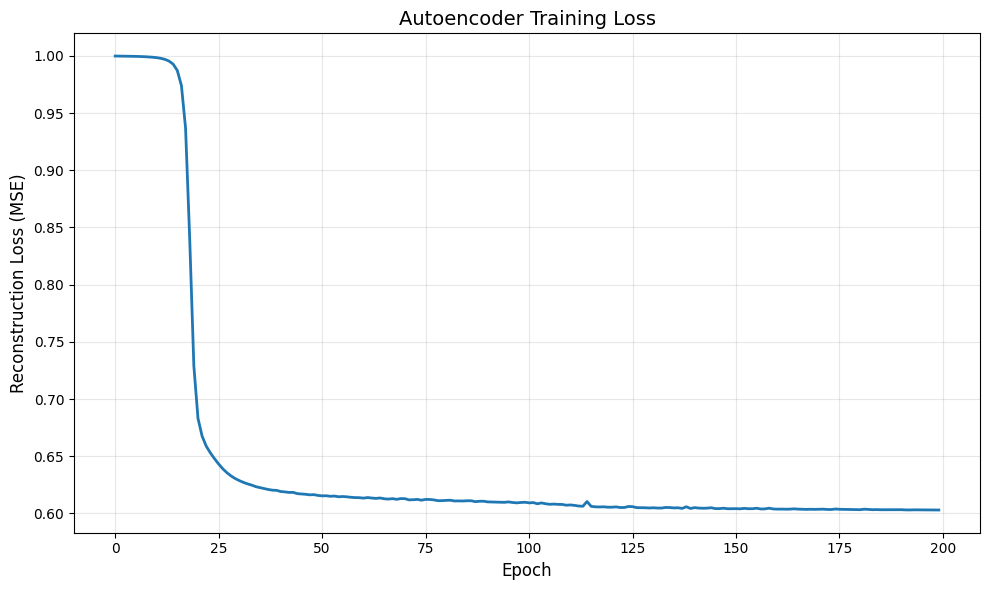

In [1273]:
layer_sizes = [30, 20, 10, 2, 10, 20, 30]
ae = Autoencoder(layer_sizes, activation='tanh', lr=0.012, l2=0.001)

ae.train(X_scaled, epochs=200, batch_size=32)
ae.plot_training_curve()

# 3.K-Means

In [71]:

def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
    
    # #setting K
    # K = centroids.shape[0]

    # idx = np.zeros(X.shape[0], dtype=int)

    # for i in range (X.shape[0]):
    #     distance=[]
    #     for j in range(centroids.shape[0]):
    #         norm_ij= np.linalg.norm(X[i] - centroids[j]) 
    #         distance.append(norm_ij)
    #     idx[i]=np.argmin(distance)        
            
            
    # return idx


#with vectorization
    # Compute squared distances
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

In [72]:

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    
    for k in range(K):
        points = X[idx == k]
        if len(points) > 0:  # Handle empty clusters
            centroids[k] = np.mean(points, axis=0)
        else:
            # Reinitialize empty cluster to a random point
            centroids[k] = X[np.random.choice(m)]
    
    return centroids

 

In [73]:
def compute_inertia(X, idx, centroids):
    return np.sum((X - centroids[idx]) ** 2)


In [74]:

def kMeans_init_centroids_random(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids



In [75]:

def kMeans_init_centroids_plusplus(X, K):
    """
    Initialize K centroids using K-Means++ algorithm
    
    Args:
        X (ndarray): (m, n) Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): (K, n) Initialized centroids
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    # Step 1: Choose first centroid randomly
    centroids[0] = X[np.random.choice(m)]
    
    # Step 2: Choose remaining centroids
    for k in range(1, K):
        # Compute distances to nearest centroid for each point
        distances = np.array([min([np.linalg.norm(x - c)**2 for c in centroids[:k]]) for x in X])
        
        # Choose next centroid with probability proportional to distance squared
        probabilities = distances / distances.sum()
        cumulative_probs = probabilities.cumsum()
        r = np.random.rand()
        
        for idx, prob in enumerate(cumulative_probs):
            if r < prob:
                centroids[k] = X[idx]
                break
    
    return centroids


In [76]:
   
def run_kMeans(X, initial_centroids, max_iters=100, epsilon=1e-4, verbose=True):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros(m,dtype=int )
    inertia_history = []


    # Run K-Means
    for i in range(max_iters):
        if verbose:
            print(f"K-Means iteration {i+1}/{max_iters}")
        
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Compute inertia (WCSS) (within-cluster sum of squares)
        inertia = compute_inertia(X, idx, centroids)
        inertia_history.append(inertia)

        new_centroids = compute_centroids(X, idx, K)
        centroid_shift = np.linalg.norm(new_centroids - centroids)
        if verbose:
            print(f"  Inertia: {inertia:.4f}, Centroid shift: {centroid_shift:.6f}")


        if centroid_shift < epsilon:
            if verbose:
                print(f"Converged at iteration {i+1}")
            centroids = new_centroids
            return centroids, idx,inertia_history,i+1
        
        centroids = new_centroids
    if verbose:
        print(f"Reached maximum iterations ({max_iters})")
    return centroids, idx,inertia_history,max_iters
    



# 4.Gaussian Mixture Models (GMM)


In [77]:
def log_multivariate_normal(X, mean, cov):
    d = X.shape[1]
    cov += np.eye(d) * 1e-6 
    sign, logdet = np.linalg.slogdet(cov)
    inv_cov = np.linalg.inv(cov)
    diff = X - mean
    return -0.5 * (d * np.log(2 * np.pi) + logdet + np.sum(diff @ inv_cov * diff, axis=1))

In [78]:
class GMM:
    def __init__(self, n_components, covariance_type='full', max_iter=100, tol=1e-4):
        self.K = n_components
        self.covariance_type = covariance_type
        self.max_iter = max_iter
        self.tol = tol

    def _initialize(self, X):
        N, D = X.shape
        self.pi = np.ones(self.K) / self.K
        self.mu = X[np.random.choice(N, self.K, replace=False)]

        if self.covariance_type == 'tied':
            self.cov = np.cov(X.T) + np.eye(D) * 1e-6
        elif self.covariance_type == 'diagonal':
            var = np.var(X, axis=0)
            self.cov = np.array([np.maximum(var, 1e-6) for _ in range(self.K)])
        elif self.covariance_type == 'spherical':
            var = np.mean(np.var(X, axis=0))
            self.cov = np.array([max(var, 1e-6) for _ in range(self.K)])
        else:  # full
            cov_matrix = np.cov(X.T) + np.eye(D) * 1e-6
            self.cov = np.array([cov_matrix for _ in range(self.K)])

    def _e_step(self, X):
        N, D = X.shape
        log_resp = np.zeros((N, self.K))
        for k in range(self.K):
            if self.covariance_type == 'spherical':
                cov = np.eye(D) * self.cov[k]
            elif self.covariance_type == 'diagonal':
                cov = np.diag(self.cov[k])
            elif self.covariance_type == 'tied':
                cov = self.cov
            else:  # full
                cov = self.cov[k]
            log_resp[:, k] = np.log(self.pi[k]) + log_multivariate_normal(X, self.mu[k], cov)
        log_sum = np.logaddexp.reduce(log_resp, axis=1)
        self.log_likelihood = np.sum(log_sum)
        resp = np.exp(log_resp - log_sum[:, None])
        return resp

    def _m_step(self, X, resp):
        N, D = X.shape
        Nk = resp.sum(axis=0)
        self.pi = Nk / N
        self.mu = (resp.T @ X) / Nk[:, None]

        if self.covariance_type == 'tied':
            cov = np.zeros((D, D))
            for k in range(self.K):
                diff = X - self.mu[k]
                cov += (resp[:, k][:, None] * diff).T @ diff
            self.cov = cov / N + np.eye(D) * 1e-6

        elif self.covariance_type == 'full':
            covs = []
            for k in range(self.K):
                diff = X - self.mu[k]
                weighted = resp[:, k][:, None] * diff
                cov = (weighted.T @ diff) / Nk[k] + np.eye(D) * 1e-6
                covs.append(cov)
            self.cov = np.array(covs)

        elif self.covariance_type == 'diagonal':
            covs = []
            for k in range(self.K):
                diff = X - self.mu[k]
                weighted = resp[:, k][:, None] * diff
                var = np.sum(weighted * diff, axis=0) / Nk[k]  # (D,)
                var = np.maximum(var, 1e-6)
                covs.append(var)
            self.cov = np.array(covs)  # shape (K,D), keep as vector

        elif self.covariance_type == 'spherical':
            covs = []
            for k in range(self.K):
                diff = X - self.mu[k]
                weighted = resp[:, k][:, None] * diff
                var = np.trace((weighted.T @ diff) / Nk[k]) / X.shape[1]  # scalar
                var = max(var, 1e-6)
                covs.append(var)
            self.cov = np.array(covs)  # shape (K,), keep as scalar


    def fit(self, X):
        self._initialize(X)
        self.log_likelihood_history = []   
        prev_ll = None
        self.n_iter = 0

        for i in range(self.max_iter):
            resp = self._e_step(X)
            self._m_step(X, resp)

            self.log_likelihood_history.append(self.log_likelihood)  
            self.n_iter += 1

            if prev_ll is not None and abs(self.log_likelihood - prev_ll) < self.tol:
                break
            prev_ll = self.log_likelihood



    def predict(self, X):
        resp = self._e_step(X)
        return np.argmax(resp, axis=1)


In [79]:
def map_clusters_to_labels(y_true, y_cluster):
    y_pred = np.zeros_like(y_cluster)
    for c in np.unique(y_cluster):
        mask = (y_cluster == c)
        y_pred[mask] = np.bincount(y_true[mask]).argmax()
    return y_pred

In [80]:
def compute_gmm_params(n_components, n_features, cov_type):
    # mixture weights
    params = n_components - 1

    # means
    params += n_components * n_features

    if cov_type == 'full':
        params += n_components * (n_features * (n_features + 1) // 2)
    elif cov_type == 'tied':
        params += (n_features * (n_features + 1) // 2)
    elif cov_type == 'diagonal':
        params += n_components * n_features
    elif cov_type == 'spherical':
        params += n_components

    return params


In [81]:
def compute_aic_bic(log_likelihood, n_params, n_samples):
    aic = 2 * n_params - 2 * log_likelihood
    bic = n_params * np.log(n_samples) - 2 * log_likelihood
    return aic, bic


In [82]:
covariance_types = ['full', 'tied', 'diagonal', 'spherical']
n_components_range = range(1, 7) 
gmm_results = []
n_samples, n_features = X_scaled.shape

for cov_type in covariance_types:
    for k in n_components_range:
        print(f"Running GMM: cov={cov_type}, components={k}")

        gmm = GMM(
            n_components=k,
            covariance_type=cov_type,
            max_iter=200,
            tol=1e-4
        )

        gmm.fit(X_scaled)

        log_likelihood = gmm.log_likelihood
        n_params = compute_gmm_params(k, n_features, cov_type)

        aic, bic = compute_aic_bic(
            log_likelihood=log_likelihood,
            n_params=n_params,
            n_samples=n_samples
        )

        gmm_results.append({
            "covariance": cov_type,
            "components": k,
            "log_likelihood": log_likelihood,
            "AIC": aic,
            "BIC": bic,
            "iterations": gmm.n_iter
        })

Running GMM: cov=full, components=1
Running GMM: cov=full, components=2
Running GMM: cov=full, components=3
Running GMM: cov=full, components=4
Running GMM: cov=full, components=5
Running GMM: cov=full, components=6
Running GMM: cov=tied, components=1
Running GMM: cov=tied, components=2
Running GMM: cov=tied, components=3
Running GMM: cov=tied, components=4
Running GMM: cov=tied, components=5
Running GMM: cov=tied, components=6
Running GMM: cov=diagonal, components=1
Running GMM: cov=diagonal, components=2
Running GMM: cov=diagonal, components=3
Running GMM: cov=diagonal, components=4
Running GMM: cov=diagonal, components=5
Running GMM: cov=diagonal, components=6
Running GMM: cov=spherical, components=1
Running GMM: cov=spherical, components=2
Running GMM: cov=spherical, components=3
Running GMM: cov=spherical, components=4
Running GMM: cov=spherical, components=5
Running GMM: cov=spherical, components=6


In [83]:
import pandas as pd

df = pd.DataFrame(gmm_results)

print("\n===== Best Model per Covariance (by BIC) =====")
print(df.loc[df.groupby("covariance")["BIC"].idxmin()]
      [["covariance", "components", "BIC", "log_likelihood", "iterations"]])



===== Best Model per Covariance (by BIC) =====
   covariance  components           BIC  log_likelihood  iterations
17   diagonal           6  31117.637916   -14401.060779          37
1        full           2   7652.159373     -682.686932          31
23  spherical           6  35096.110712   -16942.214774         106
11       tied           6  10724.045377    -3300.261548          91


In [84]:
best = df.loc[df["BIC"].idxmin()]

best_gmm = GMM(
    n_components=int(best["components"]),
    covariance_type=best["covariance"],
    max_iter=200,
    tol=1e-4
)

best_gmm.fit(X_scaled)


In [85]:
clusters = best_gmm.predict(X_scaled)
y_pred = map_clusters_to_labels(y_binary, clusters)

accuracy = np.mean(y_pred == y_binary)
print(f"\nEvaluation Accuracy (after model selection): {accuracy:.4f}")



Evaluation Accuracy (after model selection): 0.8032


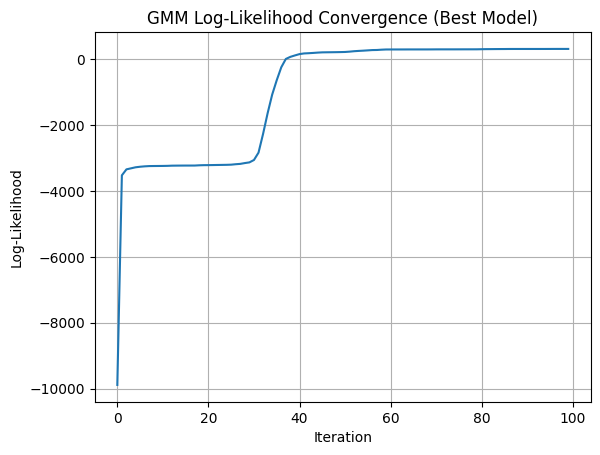

In [86]:
plt.figure()
plt.plot(best_gmm.log_likelihood_history)
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.title("GMM Log-Likelihood Convergence (Best Model)")
plt.grid(True)
plt.show()


Helper Functions

In [87]:
def silhouette_score_scratch(X, labels):
    """
    Compute mean silhouette score from scratch.

    Args:
        X (ndarray): shape (n_samples, n_features)
        labels (ndarray): cluster labels, shape (n_samples,)

    Returns:
        float: mean silhouette score
    """
    n = X.shape[0]
    unique_labels = np.unique(labels)

    # Precompute distance matrix
    dist_matrix = np.linalg.norm(X[:, None, :] - X[None, :, :], axis=2)

    silhouette_values = np.zeros(n)

    for i in range(n):
        same_cluster = labels == labels[i]
        same_cluster[i] = False  # exclude self

        # a(i): mean intra-cluster distance
        if np.sum(same_cluster) > 0:
            a_i = np.mean(dist_matrix[i, same_cluster])
        else:
            a_i = 0.0

        # b(i): minimum mean distance to other clusters
        b_i = np.inf
        for label in unique_labels:
            if label == labels[i]:
                continue
            other_cluster = labels == label
            if np.sum(other_cluster) > 0:
                dist = np.mean(dist_matrix[i, other_cluster])
                b_i = min(b_i, dist)

        silhouette_values[i] = (b_i - a_i) / max(a_i, b_i)

    return np.mean(silhouette_values)


In [88]:
centroids_random = kMeans_init_centroids_random(X_scaled, 2)
centroids_plus_plus=kMeans_init_centroids_plusplus(X_scaled, 2)
centroids_random, idx, inertia_hist, n_iters = run_kMeans(X_scaled, centroids_random, max_iters=100, verbose=False)
centroids_plus_plus, idx, inertia_hist, n_iters = run_kMeans(X_scaled, centroids_plus_plus, max_iters=100, verbose=False)

print(
    silhouette_score_scratch(X_scaled, idx),
    silhouette_score(X_scaled, idx)
)


0.3433822406907781 0.34338224069077805


In [89]:
def compute_gap_statistic(X, K, n_refs=5, init_method='plusplus'):
    """
    Compute the gap statistic for a given dataset X and number of clusters K.
    
    Parameters:
        X : ndarray
            Data array.
        K : int
            Number of clusters.
        n_refs : int
            Number of reference datasets to generate.
        init_method : str
            Initialization method: 'random' or 'plusplus'.
            
    Returns:
        gap : float
            Gap statistic value.
    """
    # Select initialization function
    if init_method == 'random':
        init_func = kMeans_init_centroids_random
    elif init_method == 'plusplus':
        init_func = kMeans_init_centroids_plusplus
    else:
        raise ValueError("init_method must be 'random' or 'plusplus'")
    
    # Reference datasets
    ref_inertia = []
    for _ in range(n_refs):
        X_ref = np.random.uniform(low=np.min(X, axis=0), high=np.max(X, axis=0), size=X.shape)
        centroids = init_func(X_ref, K)
        _, _, inertia_hist, _ = run_kMeans(X_ref, centroids, max_iters=max_iters, verbose=False)
        ref_inertia.append(inertia_hist[-1])
    
    # Original dataset
    centroids = init_func(X, K)
    _, _, inertia_hist, _ = run_kMeans(X, centroids, max_iters=max_iters, verbose=False)
    
    return np.log(np.mean(ref_inertia)) - np.log(inertia_hist[-1])


In [ ]:

def davies_bouldin_index(X, labels):
    """
    Compute Davies-Bouldin Index from scratch.
    Lower values indicate better clustering.
    
    Args:
        X (ndarray): shape (n_samples, n_features)
        labels (ndarray): cluster labels, shape (n_samples,)
    
    Returns:
        float: Davies-Bouldin Index
    """
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)
    
    if n_clusters == 1:
        return 0.0
    
    # Calculate centroids
    centroids = np.array([X[labels == k].mean(axis=0) for k in unique_labels])
    
    # Calculate average within-cluster distances (cluster diameters)
    S = np.zeros(n_clusters)
    for i, k in enumerate(unique_labels):
        cluster_points = X[labels == k]
        if len(cluster_points) > 0:
            S[i] = np.mean(np.linalg.norm(cluster_points - centroids[i], axis=1))
    
    # Calculate Davies-Bouldin Index
    DB = 0
    for i in range(n_clusters):
        max_ratio = 0
        for j in range(n_clusters):
            if i != j:
                M_ij = np.linalg.norm(centroids[i] - centroids[j])
                if M_ij > 0:
                    R_ij = (S[i] + S[j]) / M_ij
                    max_ratio = max(max_ratio, R_ij)
        DB += max_ratio
    
    return DB / n_clusters


In [ ]:


def calinski_harabasz_index(X, labels):
    """
    Compute Calinski-Harabasz Index (Variance Ratio Criterion) from scratch.
    Higher values indicate better clustering.
    
    Args:
        X (ndarray): shape (n_samples, n_features)
        labels (ndarray): cluster labels, shape (n_samples,)
    
    Returns:
        float: Calinski-Harabasz Index
    """
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)
    n_samples = X.shape[0]
    
    if n_clusters == 1 or n_clusters == n_samples:
        return 0.0
    
    # Overall mean
    overall_mean = X.mean(axis=0)
    
    # Between-cluster dispersion
    between_dispersion = 0
    for k in unique_labels:
        cluster_points = X[labels == k]
        n_k = len(cluster_points)
        cluster_mean = cluster_points.mean(axis=0)
        between_dispersion += n_k * np.sum((cluster_mean - overall_mean) ** 2)
    
    # Within-cluster dispersion
    within_dispersion = 0
    for k in unique_labels:
        cluster_points = X[labels == k]
        cluster_mean = cluster_points.mean(axis=0)
        within_dispersion += np.sum((cluster_points - cluster_mean) ** 2)
    
    # Avoid division by zero
    if within_dispersion == 0:
        return 0.0
    
    # Calculate CH index
    ch_index = (between_dispersion / (n_clusters - 1)) / (within_dispersion / (n_samples - n_clusters))
    
    return ch_index



In [ ]:

def adjusted_rand_index(y_true, y_pred):
    """
    Compute Adjusted Rand Index from scratch.
    
    Args:
        y_true (ndarray): true labels
        y_pred (ndarray): predicted cluster labels
    
    Returns:
        float: Adjusted Rand Index (ranges from -1 to 1, 1 is perfect)
    """
    from scipy.special import comb
    
    # Create contingency table
    classes = np.unique(y_true)
    clusters = np.unique(y_pred)
    
    contingency = np.zeros((len(classes), len(clusters)), dtype=np.int64)
    for i, c in enumerate(classes):
        for j, k in enumerate(clusters):
            contingency[i, j] = np.sum((y_true == c) & (y_pred == k))
    
    # Sum of combinations
    sum_comb_c = sum([comb(n_ij, 2, exact=True) for n_ij in contingency.flatten() if n_ij >= 2])
    
    # Sum over rows
    sum_comb_rows = sum([comb(np.sum(contingency[i, :]), 2, exact=True) 
                         for i in range(contingency.shape[0]) 
                         if np.sum(contingency[i, :]) >= 2])
    
    # Sum over columns
    sum_comb_cols = sum([comb(np.sum(contingency[:, j]), 2, exact=True) 
                         for j in range(contingency.shape[1]) 
                         if np.sum(contingency[:, j]) >= 2])
    
    n = len(y_true)
    total_comb = comb(n, 2, exact=True)
    
    # Expected index
    expected_index = (sum_comb_rows * sum_comb_cols) / total_comb if total_comb > 0 else 0
    
    # Max index
    max_index = (sum_comb_rows + sum_comb_cols) / 2
    
    # Adjusted Rand Index
    if max_index - expected_index == 0:
        return 0.0
    
    ari = (sum_comb_c - expected_index) / (max_index - expected_index)
    
    return ari



In [ ]:

def normalized_mutual_information(y_true, y_pred):
    """
    Compute Normalized Mutual Information from scratch.
    
    Args:
        y_true (ndarray): true labels
        y_pred (ndarray): predicted cluster labels
    
    Returns:
        float: NMI score (ranges from 0 to 1, 1 is perfect)
    """
    # Create contingency table
    classes = np.unique(y_true)
    clusters = np.unique(y_pred)
    
    contingency = np.zeros((len(classes), len(clusters)))
    for i, c in enumerate(classes):
        for j, k in enumerate(clusters):
            contingency[i, j] = np.sum((y_true == c) & (y_pred == k))
    
    n = len(y_true)
    
    # Mutual Information
    mi = 0
    for i in range(len(classes)):
        for j in range(len(clusters)):
            if contingency[i, j] > 0:
                mi += contingency[i, j] * np.log(
                    (n * contingency[i, j]) / 
                    (np.sum(contingency[i, :]) * np.sum(contingency[:, j]))
                )
    mi /= n
    
    # Entropy of true labels
    h_true = 0
    for i in range(len(classes)):
        p_i = np.sum(contingency[i, :]) / n
        if p_i > 0:
            h_true -= p_i * np.log(p_i)
    
    # Entropy of predicted labels
    h_pred = 0
    for j in range(len(clusters)):
        p_j = np.sum(contingency[:, j]) / n
        if p_j > 0:
            h_pred -= p_j * np.log(p_j)
    
    # Normalized Mutual Information
    if h_true == 0 or h_pred == 0:
        return 0.0
    
    nmi = mi / np.sqrt(h_true * h_pred)
    
    return nmi



In [ ]:

def purity_score(y_true, y_pred):
    """
    Compute Purity score from scratch.
    
    Args:
        y_true (ndarray): true labels
        y_pred (ndarray): predicted cluster labels
    
    Returns:
        float: Purity score (ranges from 0 to 1, 1 is perfect)
    """
    # Create contingency table
    classes = np.unique(y_true)
    clusters = np.unique(y_pred)
    
    contingency = np.zeros((len(classes), len(clusters)))
    for i, c in enumerate(classes):
        for j, k in enumerate(clusters):
            contingency[i, j] = np.sum((y_true == c) & (y_pred == k))
    
    # Purity: sum of max values in each column / total
    purity = np.sum(np.max(contingency, axis=0)) / len(y_true)
    
    return purity


In [ ]:


def compute_confusion_matrix(y_true, y_pred):
    """
    Compute confusion matrix from scratch.
    
    Args:
        y_true (ndarray): true labels
        y_pred (ndarray): predicted labels (after mapping clusters to labels)
    
    Returns:
        ndarray: confusion matrix
    """
    classes = np.unique(y_true)
    n_classes = len(classes)
    
    confusion = np.zeros((n_classes, n_classes), dtype=np.int64)
    
    for i, true_class in enumerate(classes):
        for j, pred_class in enumerate(classes):
            confusion[i, j] = np.sum((y_true == true_class) & (y_pred == pred_class))
    
    return confusion



In [ ]:

def plot_confusion_matrix(confusion_matrix, title="Confusion Matrix"):
    """
    Plot confusion matrix as heatmap.
    
    Args:
        confusion_matrix (ndarray): confusion matrix
        title (str): plot title
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap='Blues')
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(confusion_matrix.shape[0])
    plt.xticks(tick_marks, ['Benign', 'Malignant'])
    plt.yticks(tick_marks, ['Benign', 'Malignant'])
    
    # Add text annotations
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if confusion_matrix[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()




# Experiments

Experiment 1: K-Means on original data

In [90]:
k_vals = list(range(2, 11))   # K values to test
n_runs = 10                   # runs per K
max_iters = 100
random_state = 42
np.random.seed(random_state)

# Store results
inertia_means_random = []
inertia_stds_random = []
iters_means_random = []
iters_stds_random = []
silhouette_scores_random = []

inertia_means_plusplus = []
inertia_stds_plusplus = []
iters_means_plusplus = []
iters_stds_plusplus = []
silhouette_scores_plusplus = []

gap_values_random = []  # Gap statistic
gap_values_plusplus = []  # Gap statistic


In [91]:
for K in k_vals:
    random_inertia = []
    random_iters = []
    random_sil = []

    plusplus_inertia = []
    plusplus_iters = []
    plusplus_sil = []

    for run in range(n_runs):
        # --- Random Initialization ---
        centroids = kMeans_init_centroids_random(X_scaled, K)
        centroids, idx, inertia_hist, n_iters = run_kMeans(X_scaled, centroids, max_iters=max_iters, verbose=False)
        random_inertia.append(inertia_hist[-1])
        random_iters.append(n_iters)
        random_sil.append(silhouette_score_scratch(X_scaled, idx))

        # --- K-Means++ Initialization ---
        centroids = kMeans_init_centroids_plusplus(X_scaled, K)
        centroids, idx, inertia_hist, n_iters = run_kMeans(X_scaled, centroids, max_iters=max_iters, verbose=False)
        plusplus_inertia.append(inertia_hist[-1])
        plusplus_iters.append(n_iters)
        plusplus_sil.append(silhouette_score_scratch(X_scaled, idx))

    # Aggregate results
    inertia_means_random.append(np.mean(random_inertia))
    inertia_stds_random.append(np.std(random_inertia))
    iters_means_random.append(np.mean(random_iters))
    iters_stds_random.append(np.std(random_iters))
    silhouette_scores_random.append(np.mean(random_sil))

    inertia_means_plusplus.append(np.mean(plusplus_inertia))
    inertia_stds_plusplus.append(np.std(plusplus_inertia))
    iters_means_plusplus.append(np.mean(plusplus_iters))
    iters_stds_plusplus.append(np.std(plusplus_iters))
    silhouette_scores_plusplus.append(np.mean(plusplus_sil))

    # Gap statistic
    gap_random = compute_gap_statistic(X_scaled, K=4, init_method='random')
    gap_plusplus = compute_gap_statistic(X_scaled, K=4, init_method='plusplus')
    gap_values_random.append(gap_random)
    gap_values_plusplus.append(gap_plusplus)

KeyboardInterrupt: 

Find optimal k using: elbow method, silhouette analysis, and gap statistic 


In [ ]:

# Elbow method (second derivative)
inertia_arr = np.array(inertia_means_plusplus)
second_derivative = np.diff(np.diff(inertia_arr))
optimal_k_elbow = k_vals[np.argmin(second_derivative)+2]
print(f"Optimal K (Elbow Method): {optimal_k_elbow}")

Optimal K (Elbow Method): 8


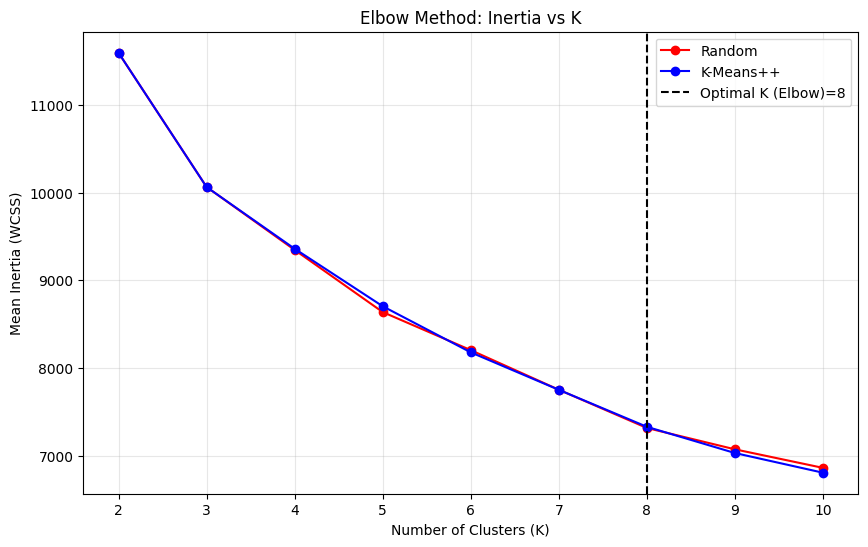

In [ ]:
# 1. Elbow Method
plt.figure(figsize=(10,6))
plt.plot(k_vals, inertia_means_random, 'ro-', label='Random')
plt.plot(k_vals, inertia_means_plusplus, 'bo-', label='K-Means++')
plt.axvline(optimal_k_elbow, color='k', linestyle='--', label=f'Optimal K (Elbow)={optimal_k_elbow}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Inertia (WCSS)')
plt.title('Elbow Method: Inertia vs K')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:

optimal_k_silhouette = k_vals[np.argmax(silhouette_scores_plusplus)]
print(f"Optimal K (Silhouette Score): {optimal_k_silhouette}")

Optimal K (Silhouette Score): 2


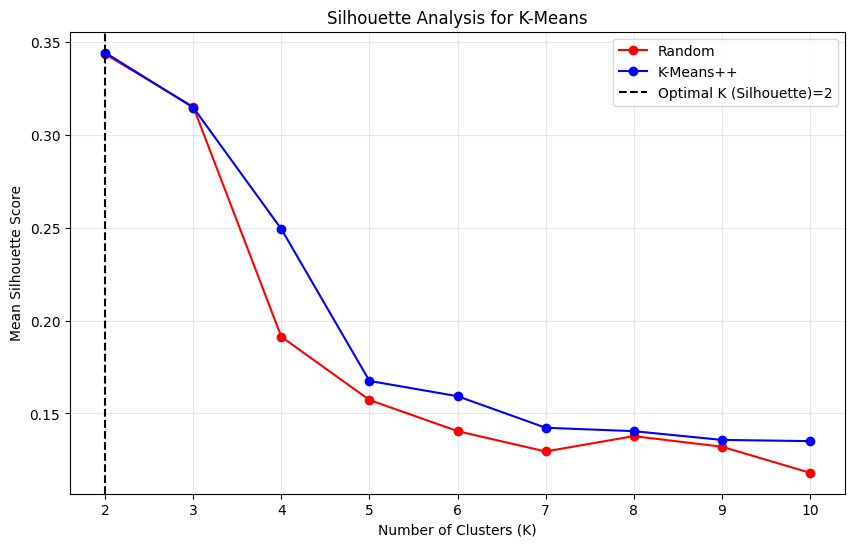

In [ ]:
# 2. Silhouette Analysis
plt.figure(figsize=(10,6))
plt.plot(k_vals, silhouette_scores_random, 'ro-', label='Random')
plt.plot(k_vals, silhouette_scores_plusplus, 'bo-', label='K-Means++')
plt.axvline(optimal_k_silhouette, color='k', linestyle='--', label=f'Optimal K (Silhouette)={optimal_k_silhouette}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Silhouette Score')
plt.title('Silhouette Analysis for K-Means')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
optimal_k_gap = k_vals[np.argmax(gap_values_plusplus)]
print(f"Optimal K (Gap Statistic): {optimal_k_gap}")

NameError: name 'gap_values' is not defined

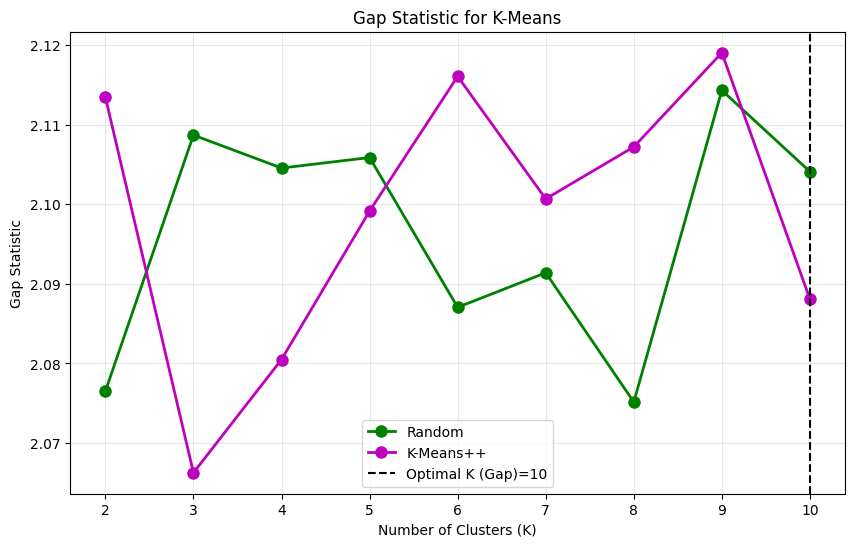

In [ ]:
# 3. Gap Statistic
plt.figure(figsize=(10,6))
plt.plot(k_vals, gap_values_random, 'go-', linewidth=2, markersize=8, label='Random')
plt.plot(k_vals, gap_values_plusplus, 'mo-', linewidth=2, markersize=8, label='K-Means++')
plt.axvline(optimal_k_gap, color='k', linestyle='--', label=f'Optimal K (Gap)={optimal_k_gap}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic for K-Means')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Report convergence speed 


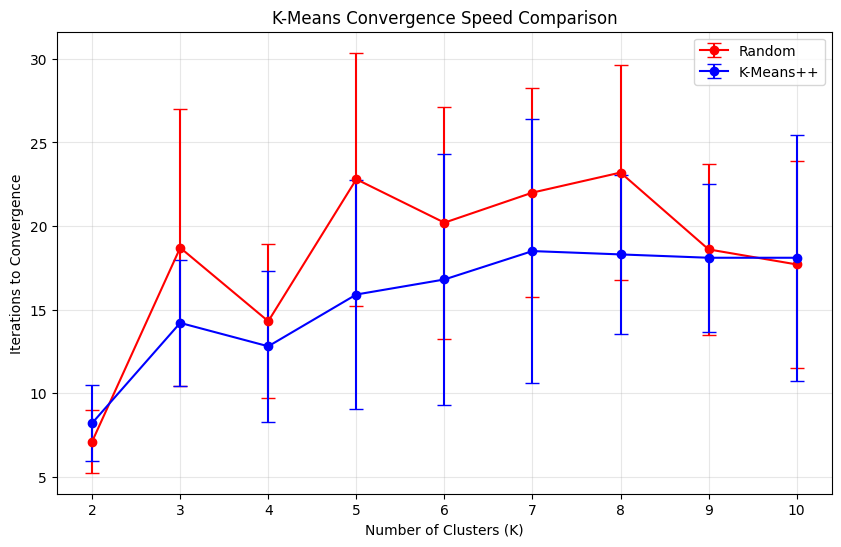

In [ ]:
# Convergence speed comparison (iterations)
plt.figure(figsize=(10,6))
plt.errorbar(k_vals, iters_means_random, yerr=iters_stds_random, fmt='ro-', capsize=5, label='Random')
plt.errorbar(k_vals, iters_means_plusplus, yerr=iters_stds_plusplus, fmt='bo-', capsize=5, label='K-Means++')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Iterations to Convergence')
plt.title('K-Means Convergence Speed Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Compare K-Means++ vs random initialization 

In [ ]:
optimal_k=optimal_k_silhouette

In [ ]:
results = {
    'random': {'inertias': [], 'iterations': []},
    'plusplus': {'inertias': [], 'iterations': []}
}

In [ ]:
print("Testing Random Initialization:")

for run in range(n_runs):
    initial_centroids = kMeans_init_centroids_random(X_scaled, K)

    centroids, idx, inertia_history, n_iters = run_kMeans(
        X_scaled,
        initial_centroids,
        max_iters=max_iters,
        verbose=False
    )

    results['random']['inertias'].append(inertia_history[-1])
    results['random']['iterations'].append(n_iters)

    print(f"  Run {run+1}: Inertia={inertia_history[-1]:.4f}, Iterations={n_iters}")

Testing Random Initialization:
  Run 1: Inertia=6727.3321, Iterations=20
  Run 2: Inertia=6944.7700, Iterations=23
  Run 3: Inertia=6762.6475, Iterations=10
  Run 4: Inertia=6871.5965, Iterations=18
  Run 5: Inertia=6850.5800, Iterations=17
  Run 6: Inertia=6880.1804, Iterations=23
  Run 7: Inertia=6762.5950, Iterations=31
  Run 8: Inertia=6834.4524, Iterations=15
  Run 9: Inertia=6799.3506, Iterations=15
  Run 10: Inertia=7013.4614, Iterations=20


In [ ]:
print("\nTesting K-Means++ Initialization:")

for run in range(n_runs):
    initial_centroids = kMeans_init_centroids_plusplus(X_scaled, K)

    centroids, idx, inertia_history, n_iters = run_kMeans(
        X_scaled,
        initial_centroids,
        max_iters=max_iters,
        verbose=False
    )

    results['plusplus']['inertias'].append(inertia_history[-1])
    results['plusplus']['iterations'].append(n_iters)

    print(f"  Run {run+1}: Inertia={inertia_history[-1]:.4f}, Iterations={n_iters}")


Testing K-Means++ Initialization:
  Run 1: Inertia=6803.0073, Iterations=20
  Run 2: Inertia=6831.5667, Iterations=17
  Run 3: Inertia=6943.4482, Iterations=13
  Run 4: Inertia=6897.2326, Iterations=13
  Run 5: Inertia=6766.7660, Iterations=14
  Run 6: Inertia=6603.0896, Iterations=20
  Run 7: Inertia=6719.7426, Iterations=24
  Run 8: Inertia=6828.0957, Iterations=19
  Run 9: Inertia=6850.9310, Iterations=20
  Run 10: Inertia=6747.4566, Iterations=21


In [ ]:
print("COMPARISON SUMMARY")
print("\nRandom Initialization:")
print(
    f"  Mean Inertia: "
    f"{np.mean(results['random']['inertias']):.4f} ± "
    f"{np.std(results['random']['inertias']):.4f}"
)
print(
    f"  Mean Iterations: "
    f"{np.mean(results['random']['iterations']):.2f} ± "
    f"{np.std(results['random']['iterations']):.2f}"
)
print(f"  Best Inertia: {np.min(results['random']['inertias']):.4f}")
print("\nK-Means++ Initialization:")
print(
    f"  Mean Inertia: "
    f"{np.mean(results['plusplus']['inertias']):.4f} ± "
    f"{np.std(results['plusplus']['inertias']):.4f}"
)
print(
    f"  Mean Iterations: "
    f"{np.mean(results['plusplus']['iterations']):.2f} ± "
    f"{np.std(results['plusplus']['iterations']):.2f}"
)
print(f"  Best Inertia: {np.min(results['plusplus']['inertias']):.4f}")

COMPARISON SUMMARY

Random Initialization:
  Mean Inertia: 6844.6966 ± 83.6193
  Mean Iterations: 19.20 ± 5.44
  Best Inertia: 6727.3321

K-Means++ Initialization:
  Mean Inertia: 6799.1336 ± 91.3746
  Mean Iterations: 18.10 ± 3.53
  Best Inertia: 6603.0896


In [ ]:
# First, extract data from results
random_inertia = results['random']['inertias']
random_iters   = results['random']['iterations']

plusplus_inertia = results['plusplus']['inertias']
plusplus_iters   = results['plusplus']['iterations']

# Then compute means and standard deviations
inertia_means = [np.mean(random_inertia), np.mean(plusplus_inertia)]
inertia_stds  = [np.std(random_inertia), np.std(plusplus_inertia)]

iters_means = [np.mean(random_iters), np.mean(plusplus_iters)]
iters_stds  = [np.std(random_iters), np.std(plusplus_iters)]

# Prepare x-axis
methods = ['Random', 'K-Means++']
x = np.arange(len(methods))
width = 0.35

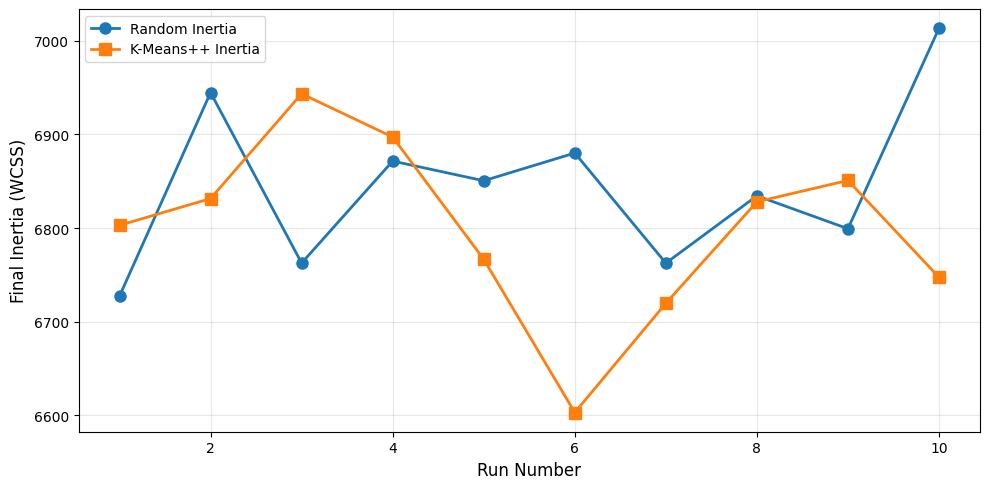

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(random_inertia)+1), random_inertia, 'o-', label='Random Inertia', linewidth=2, markersize=8)
plt.plot(range(1, len(plusplus_inertia)+1), plusplus_inertia, 's-', label='K-Means++ Inertia', linewidth=2, markersize=8)
plt.xlabel('Run Number', fontsize=12)
plt.ylabel('Final Inertia (WCSS)', fontsize=12)
# plt.title(f'Comparison of Inertia per Run (K={optimal_k})', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

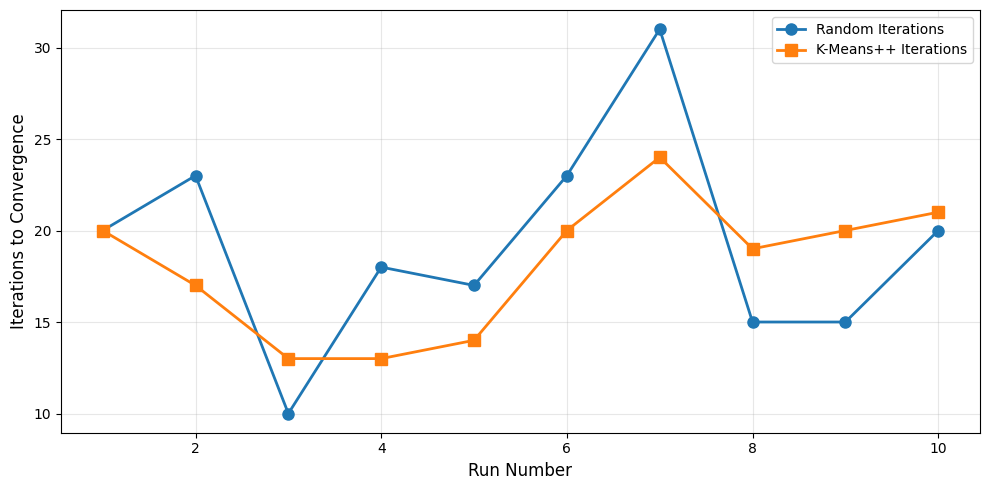

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(random_iters)+1), random_iters, 'o-', label='Random Iterations', linewidth=2, markersize=8)
plt.plot(range(1, len(plusplus_iters)+1), plusplus_iters, 's-', label='K-Means++ Iterations', linewidth=2, markersize=8)
plt.xlabel('Run Number', fontsize=12)
plt.ylabel('Iterations to Convergence', fontsize=12)
# plt.title(f'Comparison of Iterations per Run (K={optimal_k})', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

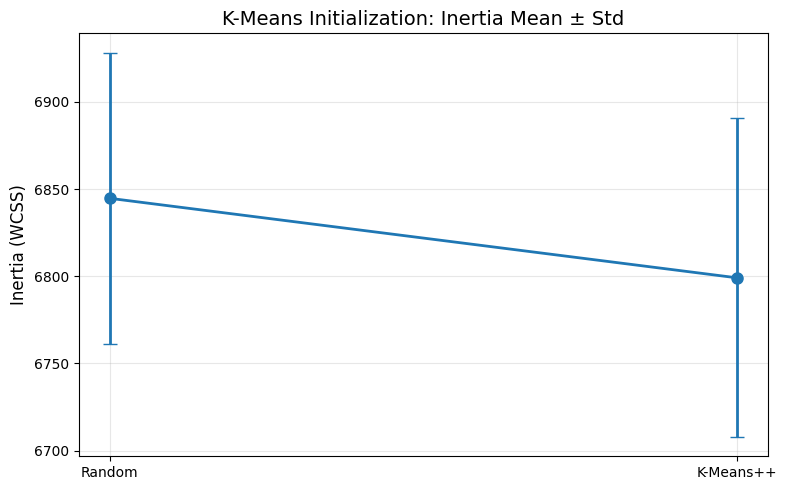

In [ ]:
plt.figure(figsize=(8, 5))
plt.errorbar(x, inertia_means, yerr=inertia_stds, fmt='-o', capsize=5, markersize=8, linewidth=2)
plt.xticks(x, methods)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.title('K-Means Initialization: Inertia Mean ± Std', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

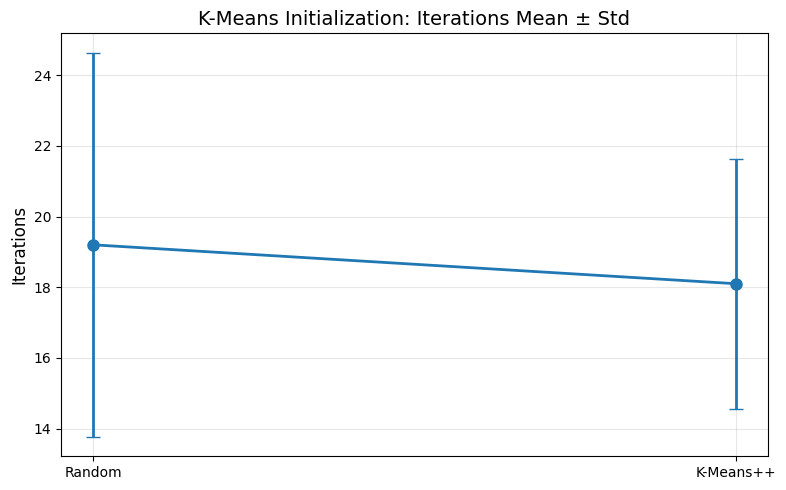

In [ ]:
plt.figure(figsize=(8, 5))
plt.errorbar(x, iters_means, yerr=iters_stds, fmt='-o', capsize=5, markersize=8, linewidth=2)
plt.xticks(x, methods)
plt.ylabel('Iterations', fontsize=12)
plt.title('K-Means Initialization: Iterations Mean ± Std', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
k_vals = list(range(2, 11))
sklearn_inertias = []

print("Running sklearn K-Means:\n")

for K in k_vals:
    kmeans = KMeans(
        n_clusters=K,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=42
    )
    
    kmeans.fit(X_scaled)
    sklearn_inertias.append(kmeans.inertia_)
    
    print(f"K = {K}: Inertia = {kmeans.inertia_:.4f}")


Running sklearn K-Means:

K = 2: Inertia = 11595.5266
K = 3: Inertia = 10061.7978
K = 4: Inertia = 9258.9891
K = 5: Inertia = 8558.6607
K = 6: Inertia = 7970.2638
K = 7: Inertia = 7540.3187
K = 8: Inertia = 7254.3262
K = 9: Inertia = 6837.6289
K = 10: Inertia = 6603.4044


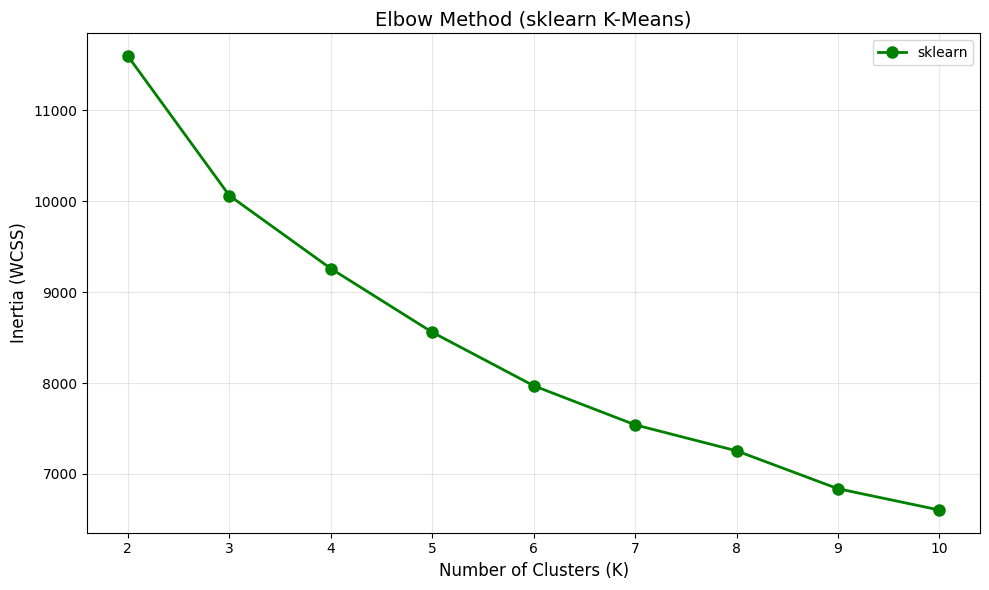

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_vals, sklearn_inertias, 'go-', linewidth=2, markersize=8, label='sklearn')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.title('Elbow Method (sklearn K-Means)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

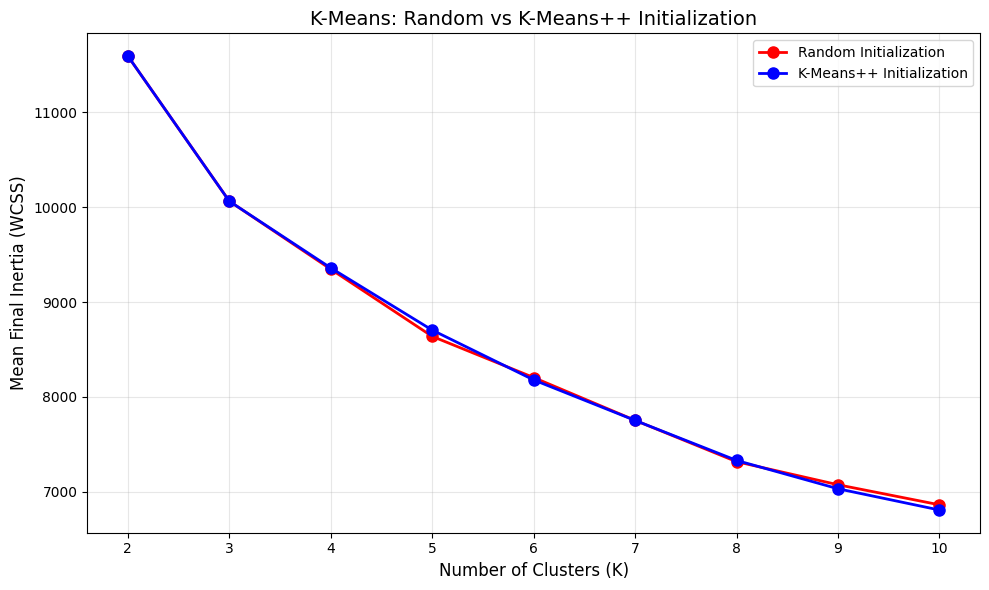

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_vals, inertia_means_random, 'ro-', linewidth=2, markersize=8, label='Random Initialization')
plt.plot(k_vals, inertia_means_plusplus, 'bo-', linewidth=2, markersize=8, label='K-Means++ Initialization')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Mean Final Inertia (WCSS)', fontsize=12)
plt.title('K-Means: Random vs K-Means++ Initialization', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Store mean inertias for each K
mean_inertia_random = []
mean_inertia_plusplus = []
diff_random = []
diff_plusplus = []

for i, K in enumerate(k_vals):
    # Compute mean inertia from your multiple runs (replace with your actual mean lists)
    mean_r = inertia_means_random[i]
    mean_p = inertia_means_plusplus[i]

    # Compute differences from sklearn KMeans
    diff_r = abs(mean_r - sklearn_inertias[i])
    diff_p = abs(mean_p - sklearn_inertias[i])

    # Store in lists
    mean_inertia_random.append(mean_r)
    mean_inertia_plusplus.append(mean_p)
    diff_random.append(diff_r)
    diff_plusplus.append(diff_p)

    print(
        f"K={K}: Scratch Random={mean_r:.4f}, "
        f"Scratch K-Means++={mean_p:.4f}, "
        f"sklearn={sklearn_inertias[i]:.4f}, "
        f"Diff Random={diff_r:.4f}, "
        f"Diff K-Means++={diff_p:.4f}"
    )

K=2: Scratch Random=11595.6667, Scratch K-Means++=11595.6363, sklearn=11595.5266, Diff Random=0.1401, Diff K-Means++=0.1097
K=3: Scratch Random=10064.6264, Scratch K-Means++=10063.9790, sklearn=10061.7978, Diff Random=2.8286, Diff K-Means++=2.1812
K=4: Scratch Random=9346.7830, Scratch K-Means++=9360.2177, sklearn=9258.9891, Diff Random=87.7939, Diff K-Means++=101.2286
K=5: Scratch Random=8638.0387, Scratch K-Means++=8704.3833, sklearn=8558.6607, Diff Random=79.3780, Diff K-Means++=145.7227
K=6: Scratch Random=8203.9560, Scratch K-Means++=8178.6884, sklearn=7970.2638, Diff Random=233.6922, Diff K-Means++=208.4245
K=7: Scratch Random=7752.2349, Scratch K-Means++=7751.4001, sklearn=7540.3187, Diff Random=211.9162, Diff K-Means++=211.0815
K=8: Scratch Random=7316.2330, Scratch K-Means++=7329.5457, sklearn=7254.3262, Diff Random=61.9068, Diff K-Means++=75.2195
K=9: Scratch Random=7072.6909, Scratch K-Means++=7030.4369, sklearn=6837.6289, Diff Random=235.0619, Diff K-Means++=192.8080
K=10: 

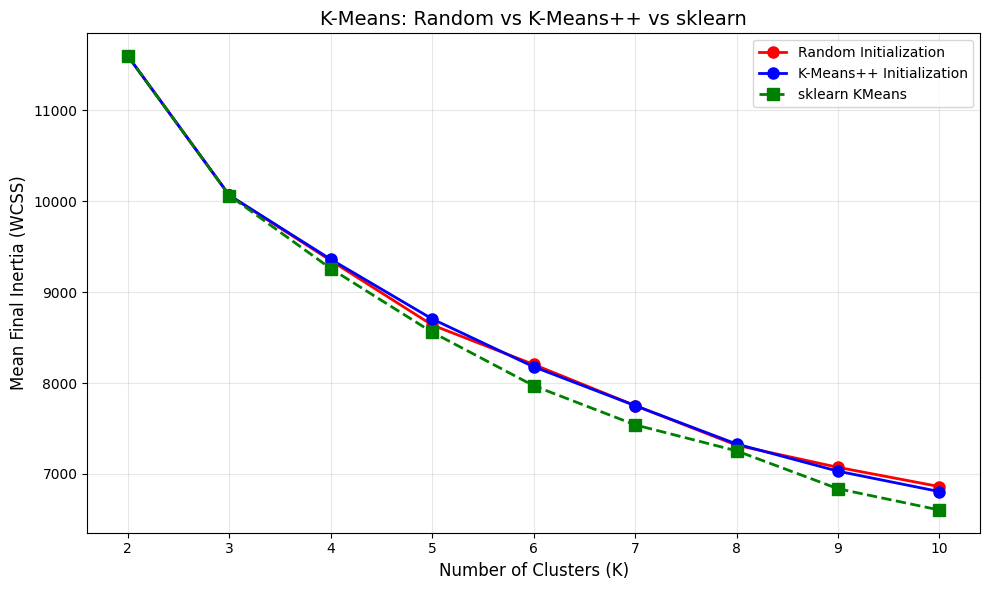

In [ ]:
# Visualization
plt.figure(figsize=(10,6))
plt.plot(k_vals, mean_inertia_random, 'ro-', linewidth=2, markersize=8, label='Random Initialization')
plt.plot(k_vals, mean_inertia_plusplus, 'bo-', linewidth=2, markersize=8, label='K-Means++ Initialization')
plt.plot(k_vals, sklearn_inertias, 'gs--', linewidth=2, markersize=8, label='sklearn KMeans')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Mean Final Inertia (WCSS)', fontsize=12)
plt.title('K-Means: Random vs K-Means++ vs sklearn', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Experiment 2: GMM on original data

Experiment 3: K-Means after PCA

In [ ]:
n_components_list = [2, 5, 10, 15, 20]
# K-Means settings
K = optimal_k  
n_runs = 10
max_iters = 100
random_state = 42
np.random.seed(random_state)

In [ ]:
results_pca = {}

for n_comp in n_components_list:
    inertia_random, silhouette_random, recon_error_random, iters_random = [], [], [], []
    inertia_plusplus, silhouette_plusplus, recon_error_plusplus, iters_plusplus = [], [], [], []

    # Apply PCA
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit(X_scaled)
    X_pca = pca.transform(X_scaled)
    X_reconstructed = pca.inverse_transform(X_pca)
    recon_error = np.mean(np.linalg.norm(X_scaled - X_reconstructed, axis=1)**2)
    for run in range(n_runs):
        # --- Random Initialization ---
        centroids = kMeans_init_centroids_random(X_pca, K)
        _, idx, inertia_hist, n_iters_run = run_kMeans(X_pca, centroids, max_iters=max_iters, verbose=False)
        inertia_random.append(inertia_hist[-1])
        silhouette_random.append(silhouette_score_scratch(X_pca, idx))
        iters_random.append(n_iters_run)
        recon_error_random.append(recon_error)

        # --- K-Means++ Initialization ---
        centroids = kMeans_init_centroids_plusplus(X_pca, K)
        _, idx, inertia_hist, n_iters_run = run_kMeans(X_pca, centroids, max_iters=max_iters, verbose=False)
        inertia_plusplus.append(inertia_hist[-1])
        silhouette_plusplus.append(silhouette_score_scratch(X_pca, idx))
        iters_plusplus.append(n_iters_run)
        recon_error_plusplus.append(recon_error)

    results_pca[n_comp] = {
        'random': {
            'inertia': np.mean(inertia_random),
            'silhouette': np.mean(silhouette_random),
            'iterations': np.mean(iters_random),
            'reconstruction_error': np.mean(recon_error_random)
        },
        'plusplus': {
            'inertia': np.mean(inertia_plusplus),
            'silhouette': np.mean(silhouette_plusplus),
            'iterations': np.mean(iters_plusplus),
            'reconstruction_error': np.mean(recon_error_plusplus)
        }
    }

In [ ]:
for n_comp in n_components_list:
    print(f"\n--- PCA with {n_comp} components ---")
    for init in ['random', 'plusplus']:
        metrics = results_pca[n_comp][init]
        print(f"{init.capitalize()} Initialization:")
        print(f"  Mean Inertia: {metrics['inertia']:.4f}")
        print(f"  Mean Silhouette: {metrics['silhouette']:.4f}")
        print(f"  Mean Iterations: {metrics['iterations']:.2f}")
        print(f"  Reconstruction Error: {metrics['reconstruction_error']:.4f}")


--- PCA with 2 components ---
Random Initialization:
  Mean Inertia: 5332.7688
  Mean Silhouette: 0.5083
  Mean Iterations: 7.50
  Reconstruction Error: 11.0270
Plusplus Initialization:
  Mean Inertia: 5332.8115
  Mean Silhouette: 0.5082
  Mean Iterations: 8.00
  Reconstruction Error: 11.0270

--- PCA with 5 components ---
Random Initialization:
  Mean Inertia: 8992.1456
  Mean Silhouette: 0.3917
  Mean Iterations: 7.20
  Reconstruction Error: 4.5797
Plusplus Initialization:
  Mean Inertia: 8991.9473
  Mean Silhouette: 0.3927
  Mean Iterations: 7.80
  Reconstruction Error: 4.5797

--- PCA with 10 components ---
Random Initialization:
  Mean Inertia: 10770.6050
  Mean Silhouette: 0.3567
  Mean Iterations: 8.10
  Reconstruction Error: 1.4529
Plusplus Initialization:
  Mean Inertia: 10770.6681
  Mean Silhouette: 0.3571
  Mean Iterations: 8.00
  Reconstruction Error: 1.4529

--- PCA with 15 components ---
Random Initialization:
  Mean Inertia: 11365.6009
  Mean Silhouette: 0.3469
  Mean I

Reconstruction error vs number of components

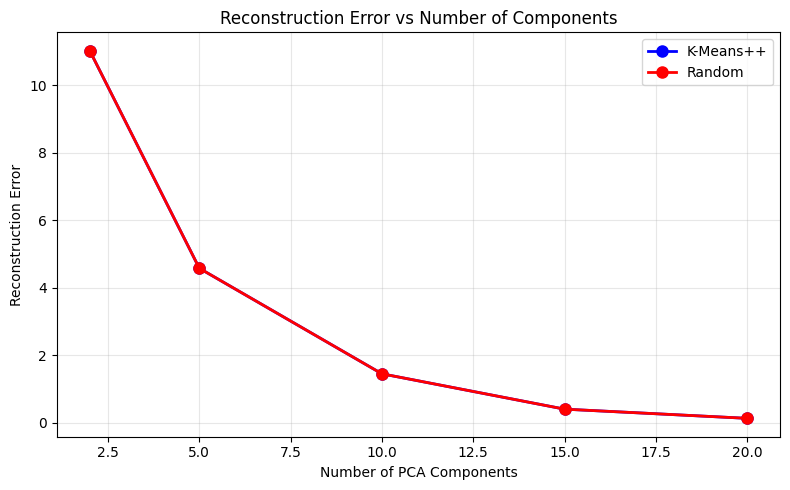

In [ ]:
plt.figure(figsize=(8,5))
recon_errors_plusplus = [results_pca[n]['plusplus']['reconstruction_error'] for n in n_components_list]
recon_errors_random = [results_pca[n]['random']['reconstruction_error'] for n in n_components_list]
plt.plot(n_components_list, recon_errors_plusplus, 'bo-', linewidth=2, markersize=8, label='K-Means++')
plt.plot(n_components_list, recon_errors_random, 'ro-', linewidth=2, markersize=8, label='Random')
plt.xlabel('Number of PCA Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs Number of Components')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Clustering Performance 

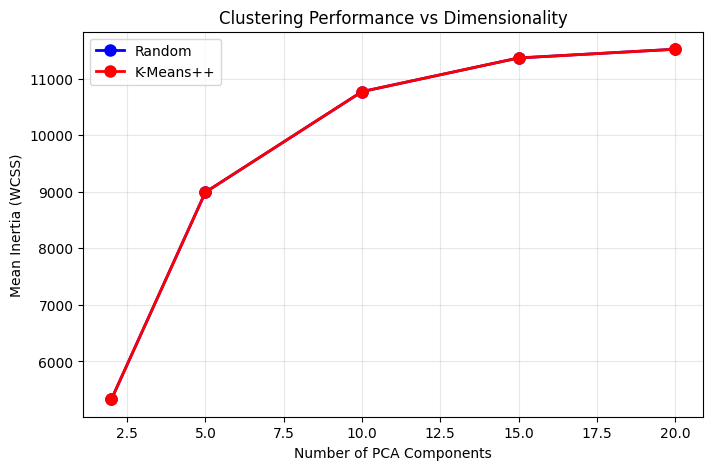

In [ ]:
plt.figure(figsize=(8,5))
inertia_vals_plusplus = [results_pca[n]['plusplus']['inertia'] for n in n_components_list]
inertia_vals_random = [results_pca[n]['random']['inertia'] for n in n_components_list]
plt.plot(n_components_list, inertia_vals_random, 'bo-', linewidth=2, markersize=8, label='Random')
plt.plot(n_components_list, inertia_vals_plusplus, 'ro-', linewidth=2, markersize=8, label='K-Means++')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Inertia (WCSS)')
plt.title('Clustering Performance vs Dimensionality')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

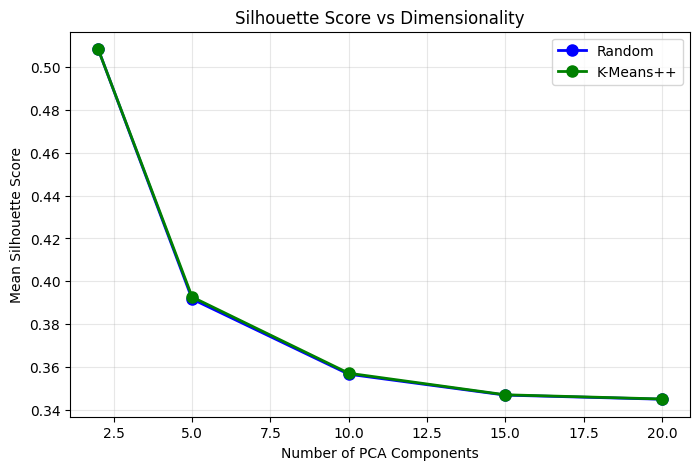

In [ ]:
plt.figure(figsize=(8,5))
silhouette_vals_plusplus = [results_pca[n]['plusplus']['silhouette'] for n in n_components_list]
silhuoette_vals_random = [results_pca[n]['random']['silhouette'] for n in n_components_list]
plt.plot(n_components_list, silhuoette_vals_random, 'bo-', linewidth=2, markersize=8, label='Random')
plt.plot(n_components_list, silhouette_vals_plusplus, 'go-', linewidth=2, markersize=8, label='K-Means++')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Silhouette Score')
plt.title('Silhouette Score vs Dimensionality')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [ ]:
n_components_list = [2, 5, 10, 15, 20]

recon_error_random = [results_pca[n]['random']['reconstruction_error'] for n in n_components_list]
silhouette_random = [results_pca[n]['random']['silhouette'] for n in n_components_list]
inertia_random = [results_pca[n]['random']['inertia'] for n in n_components_list]

recon_error_plusplus = [results_pca[n]['plusplus']['reconstruction_error'] for n in n_components_list]
silhouette_plusplus = [results_pca[n]['plusplus']['silhouette'] for n in n_components_list]
inertia_plusplus = [results_pca[n]['plusplus']['inertia'] for n in n_components_list]

In [ ]:
print("PCA Dimensionality vs Clustering Metrics\n")
print("Components | Random Silhouette | Random Inertia | Random ReconErr | ++ Silhouette | ++ Inertia | ++ ReconErr")
for i, n in enumerate(n_components_list):
    print(f"{n:10d} | {silhouette_random[i]:16.4f} | {inertia_random[i]:13.4f} | {recon_error_random[i]:15.4f} | "
          f"{silhouette_plusplus[i]:13.4f} | {inertia_plusplus[i]:11.4f} | {recon_error_plusplus[i]:12.4f}")

PCA Dimensionality vs Clustering Metrics

Components | Random Silhouette | Random Inertia | Random ReconErr | ++ Silhouette | ++ Inertia | ++ ReconErr
         2 |           0.5083 |     5332.7688 |         11.0270 |        0.5082 |   5332.8115 |      11.0270
         5 |           0.3917 |     8992.1456 |          4.5797 |        0.3927 |   8991.9473 |       4.5797
        10 |           0.3567 |    10770.6050 |          1.4529 |        0.3571 |  10770.6681 |       1.4529
        15 |           0.3469 |    11365.6009 |          0.4054 |        0.3471 |  11365.5452 |       0.4054
        20 |           0.3450 |    11520.1344 |          0.1328 |        0.3451 |  11520.0880 |       0.1328


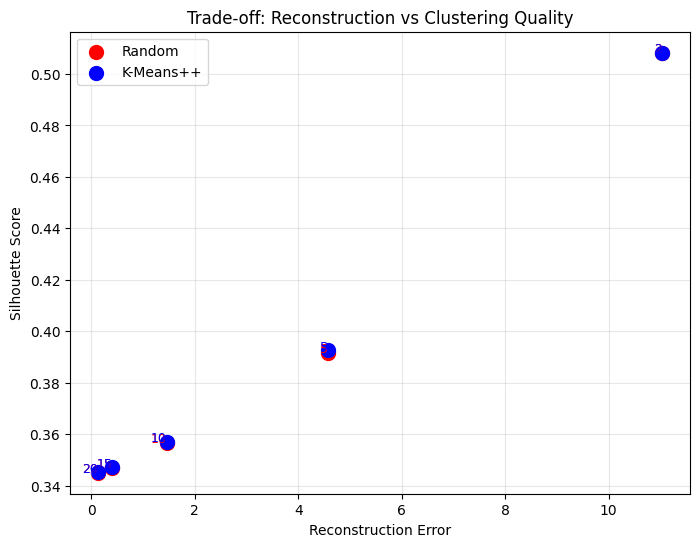

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(recon_errors_random, silhouette_random, c='red', s=100, label='Random')
plt.scatter(recon_errors_plusplus, silhouette_plusplus, c='blue', s=100, label='K-Means++')

for i, n in enumerate(n_components_list):
    plt.text(recon_errors_random[i], silhouette_random[i], f'{n}', color='red', fontsize=9, ha='right')
    plt.text(recon_errors_plusplus[i], silhouette_plusplus[i], f'{n}', color='blue', fontsize=9, ha='right')

plt.xlabel('Reconstruction Error')
plt.ylabel('Silhouette Score')
plt.title('Trade-off: Reconstruction vs Clustering Quality')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Experiment 4: GMM after PCA

In [ ]:
pca_dims = [2, 5, 10, 15, 20]

cov_types = ['full', 'tied', 'diagonal', 'spherical']
gmm_pca_results = []

for n_dim in pca_dims:
    # Apply PCA
    pca = PCA(n_components=n_dim)
    pca.fit(X_scaled)
    X_pca = pca.transform(X_scaled)
    recon_error = pca.reconstruction_error(X_scaled)
    
    for cov_type in cov_types:
        for k in range(1, 7):  # number of GMM components
            gmm = GMM(n_components=k, covariance_type=cov_type, max_iter=200)
            gmm.fit(X_pca)
            
            log_likelihood = gmm.log_likelihood
            n_params = compute_gmm_params(k, n_dim, cov_type)
            aic, bic = compute_aic_bic(log_likelihood, n_params, X_pca.shape[0])
            
            gmm_pca_results.append({
                "pca_dim": n_dim,
                "reconstruction_error": recon_error,
                "covariance": cov_type,
                "components": k,
                "log_likelihood": log_likelihood,
                "AIC": aic,
                "BIC": bic,
                "iterations": gmm.n_iter
            })

df_gmm_pca = pd.DataFrame(gmm_pca_results)
# Find best model per PCA dimension by BIC
best_per_dim = df_gmm_pca.loc[df_gmm_pca.groupby("pca_dim")["BIC"].idxmin()]
print(best_per_dim[["pca_dim","reconstruction_error","covariance","components","BIC","log_likelihood"]])

     pca_dim  reconstruction_error covariance  components           BIC  \
19         2              0.367568  spherical           2   5407.877519   
27         5              0.152657       full           4  11180.692435   
63        10              0.048431   diagonal           4  17087.433295   
88        15              0.013512   diagonal           5  19968.593330   
111       20              0.004428   diagonal           4  18828.128150   

     log_likelihood  
19     -2681.735178  
27     -5327.075180  
63     -8280.445610  
88     -9495.817871  
111    -8897.037820  


Experiment 5: K-Means after Autoencoder

In [ ]:
bottleneck_sizes = [2, 5, 10, 15, 20]
n_runs = 10
K_range = [2, 3, 4, 5, 6]  # number of clusters to test
kmeans_ae_results = []

In [ ]:
for bottleneck in bottleneck_sizes:
    print(f"\n--- Autoencoder with bottleneck={bottleneck} ---")
    
    # Define AE layer sizes
    layer_sizes = [X_scaled.shape[1], 30, 20, bottleneck, 20, 30, X_scaled.shape[1]]
    ae = Autoencoder(layer_sizes, activation='relu', lr=0.01, l2=0.001)
    ae.train(X_scaled, epochs=200, batch_size=32)
    
    # Extract bottleneck features
    def encode(X):
        a = X
        for W, b in zip(ae.weights[:4], ae.biases[:4]):  # up to bottleneck
            a = relu(np.dot(a, W) + b)
        return a
    X_bottleneck = encode(X_scaled)
    
    # Compute reconstruction error
    X_reconstructed = ae.forward(X_scaled)
    recon_error = np.mean((X_scaled - X_reconstructed) ** 2)
    print(f"Reconstruction Error: {recon_error:.4f}")
    
    # Run K-Means for different cluster numbers
    for k in K_range:
        inertia_random, silhouette_random, iters_random = [], [], []
        inertia_plusplus, silhouette_plusplus, iters_plusplus = [], [], []
        
        for run in range(n_runs):
            # Random init
            centroids = kMeans_init_centroids_random(X_bottleneck, k)
            _, idx, inertia_hist, n_iters_run = run_kMeans(X_bottleneck, centroids, max_iters=max_iters, verbose=False)
            inertia_random.append(inertia_hist[-1])
            silhouette_random.append(silhouette_score_scratch(X_bottleneck, idx))
            iters_random.append(n_iters_run)
            
            # K-Means++ init
            centroids = kMeans_init_centroids_plusplus(X_bottleneck, k)
            _, idx, inertia_hist, n_iters_run = run_kMeans(X_bottleneck, centroids, max_iters=max_iters, verbose=False)
            inertia_plusplus.append(inertia_hist[-1])
            silhouette_plusplus.append(silhouette_score_scratch(X_bottleneck, idx))
            iters_plusplus.append(n_iters_run)
        
        kmeans_ae_results.append({
            "bottleneck": bottleneck,
            "reconstruction_error": recon_error,
            "K": k,
            "inertia_random": np.mean(inertia_random),
            "silhouette_random": np.mean(silhouette_random),
            "iterations_random": np.mean(iters_random),
            "inertia_plusplus": np.mean(inertia_plusplus),
            "silhouette_plusplus": np.mean(silhouette_plusplus),
            "iterations_plusplus": np.mean(iters_plusplus)
        })


--- Autoencoder with bottleneck=2 ---
Epoch 0, Loss: 1.00000
Epoch 10, Loss: 1.00000
Epoch 20, Loss: 1.00000
Epoch 30, Loss: 1.00000
Epoch 40, Loss: 1.00000
Epoch 50, Loss: 1.00000
Epoch 60, Loss: 1.00000
Epoch 70, Loss: 1.00000
Epoch 80, Loss: 1.00000
Epoch 90, Loss: 1.00000
Epoch 100, Loss: 1.00000
Epoch 110, Loss: 1.00000
Epoch 120, Loss: 1.00000
Epoch 130, Loss: 1.00000
Epoch 140, Loss: 1.00000
Epoch 150, Loss: 1.00000
Epoch 160, Loss: 1.00000
Epoch 170, Loss: 1.00000
Epoch 180, Loss: 1.00000
Epoch 190, Loss: 1.00000
Reconstruction Error: 1.0000

--- Autoencoder with bottleneck=5 ---
Epoch 0, Loss: 0.99977
Epoch 10, Loss: 0.99787
Epoch 20, Loss: 0.90183
Epoch 30, Loss: 0.81553
Epoch 40, Loss: 0.81403
Epoch 50, Loss: 0.81290
Epoch 60, Loss: 0.81189
Epoch 70, Loss: 0.81089
Epoch 80, Loss: 0.81003
Epoch 90, Loss: 0.80440
Epoch 100, Loss: 0.80358
Epoch 110, Loss: 0.80290
Epoch 120, Loss: 0.80233
Epoch 130, Loss: 0.80179
Epoch 140, Loss: 0.80131
Epoch 150, Loss: 0.80085
Epoch 160, Loss

In [ ]:
#  Prepare PCA results as DataFrame ---
pca_data = []
for n_comp, metrics in results_pca.items():
    for init in ['random', 'plusplus']:
        pca_data.append({
            'n_components': n_comp,
            'K': K,  # assuming single K for PCA runs
            'reconstruction_error': metrics[init]['reconstruction_error'],
            'inertia': metrics[init]['inertia'],
            'silhouette': metrics[init]['silhouette'],
            'iterations': metrics[init]['iterations'],
            'init': init
        })
pca_df = pd.DataFrame(pca_data)

In [ ]:
# Prepare AE results as DataFrame ---
ae_df = pd.DataFrame(kmeans_ae_results)

# For simplicity, we can aggregate by bottleneck and K
ae_summary = ae_df.groupby(['bottleneck', 'K']).agg({
    'reconstruction_error': 'mean',
    'inertia_random': 'mean',
    'silhouette_random': 'mean',
    'iterations_random': 'mean',
    'inertia_plusplus': 'mean',
    'silhouette_plusplus': 'mean',
    'iterations_plusplus': 'mean'
}).reset_index()

In [ ]:
# --- 3. Compare AE vs PCA ---
print("\n--- AE Summary ---")
print(ae_summary.head())


--- AE Summary ---
   bottleneck  K  reconstruction_error  inertia_random  silhouette_random  \
0           2  2                   1.0        0.000536           0.871942   
1           2  3                   1.0        0.000251           0.865675   
2           2  4                   1.0        0.000206           0.841431   
3           2  5                   1.0        0.000167           0.847668   
4           2  6                   1.0        0.000117           0.863739   

   iterations_random  inertia_plusplus  silhouette_plusplus  \
0                4.9          0.000537             0.871498   
1                8.5          0.000276             0.857548   
2                8.7          0.000170             0.861097   
3               10.8          0.000138             0.844618   
4               15.8          0.000100             0.845215   

   iterations_plusplus  
0                  4.3  
1                  7.0  
2                  5.0  
3                  4.8  
4            

In [ ]:
print("\n--- PCA Summary ---")
print(pca_df.head())


--- PCA Summary ---
   n_components  K  reconstruction_error       inertia  silhouette  \
0             2  2             11.027038   5332.768805    0.508280   
1             2  2             11.027038   5332.811451    0.508242   
2             5  2              4.579718   8992.145645    0.391711   
3             5  2              4.579718   8991.947288    0.392677   
4            10  2              1.452936  10770.604958    0.356663   

   iterations      init  
0         7.5    random  
1         8.0  plusplus  
2         7.2    random  
3         7.8  plusplus  
4         8.1    random  


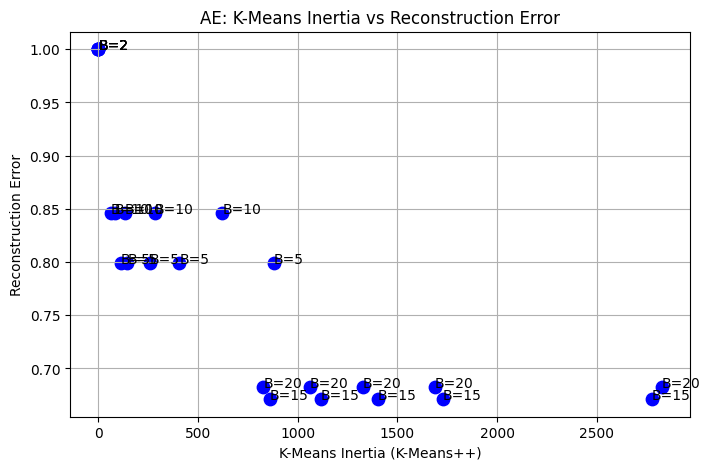

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(ae_summary['inertia_plusplus'], ae_summary['reconstruction_error'], color='blue', s=80)
for i, bottleneck in enumerate(ae_summary['bottleneck']):
    plt.text(ae_summary['inertia_plusplus'][i], ae_summary['reconstruction_error'][i], f"B={bottleneck}")
plt.xlabel('K-Means Inertia (K-Means++)')
plt.ylabel('Reconstruction Error')
plt.title('AE: K-Means Inertia vs Reconstruction Error')
plt.grid(True)
plt.show()

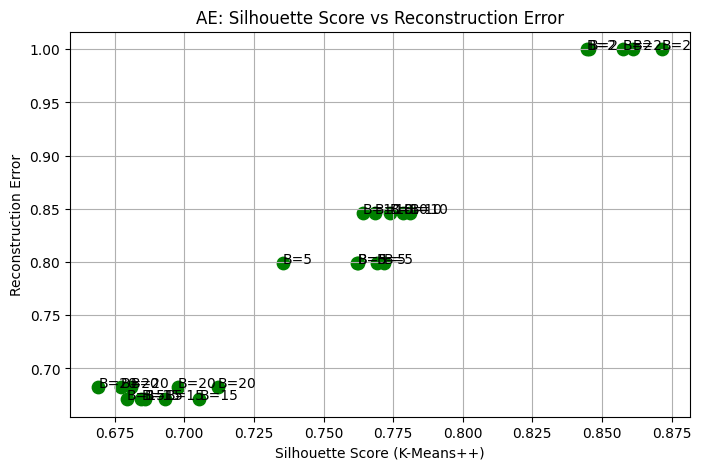

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(ae_summary['silhouette_plusplus'], ae_summary['reconstruction_error'], color='green', s=80)
for i, bottleneck in enumerate(ae_summary['bottleneck']):
    plt.text(ae_summary['silhouette_plusplus'][i], ae_summary['reconstruction_error'][i], f"B={bottleneck}")
plt.xlabel('Silhouette Score (K-Means++)')
plt.ylabel('Reconstruction Error')
plt.title('AE: Silhouette Score vs Reconstruction Error')
plt.grid(True)
plt.show()

Reconstruction Error

PCA: Measures the squared distance between original and reconstructed data after projecting onto n_components. PCA guarantees minimal linear reconstruction error for the given number of components.

Autoencoder: Measures the same but with a neural network, which can capture non-linear structure

Observation:

If reconstruction_error_ae < reconstruction_error_pca → AE is better at compressing data, likely because it captures non-linear patterns.

If reconstruction_error_ae > reconstruction_error_pca → PCA may suffice; AE might need tuning (more epochs, smaller lr, etc.).

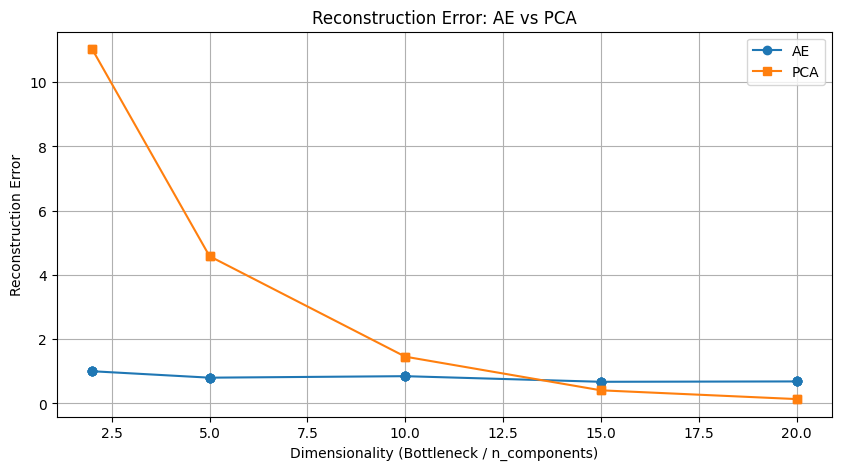

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(ae_summary['bottleneck'], ae_summary['reconstruction_error'], 'o-', label='AE')
plt.plot(pca_df['n_components'], pca_df['reconstruction_error'], 's-', label='PCA')
plt.xlabel('Dimensionality (Bottleneck / n_components)')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error: AE vs PCA')
plt.legend()
plt.grid(True)
plt.show()

Experiment 6: GMM after Autoencoder

In [ ]:
bottleneck_sizes = [2, 5, 10, 15, 20]
cov_types = ['full', 'tied', 'diagonal', 'spherical']
gmm_ae_results = []

for bottleneck in bottleneck_sizes:
    print(f"Training Autoencoder with bottleneck={bottleneck}")
    layer_sizes = [X_scaled.shape[1], 30, 20, bottleneck, 20, 30, X_scaled.shape[1]]
    ae = Autoencoder(layer_sizes, activation='relu', lr=0.01, l2=0.001)
    ae.train(X_scaled, epochs=200, batch_size=32)
    
    # Extract bottleneck features
    X_ae = ae.forward(X_scaled)
    
    # Compute reconstruction error
    recon_error = np.mean((X_scaled - X_ae) ** 2)
    
    # Run GMM on bottleneck features
    for cov_type in cov_types:
        for k in range(1, 7):
            gmm = GMM(n_components=k, covariance_type=cov_type, max_iter=200)
            gmm.fit(X_ae)
            
            log_likelihood = gmm.log_likelihood
            n_params = compute_gmm_params(k, bottleneck, cov_type)
            aic, bic = compute_aic_bic(log_likelihood, n_params, X_ae.shape[0])
            
            gmm_ae_results.append({
                "bottleneck": bottleneck,
                "reconstruction_error": recon_error,
                "covariance": cov_type,
                "components": k,
                "log_likelihood": log_likelihood,
                "AIC": aic,
                "BIC": bic,
                "iterations": gmm.n_iter
            })

df_gmm_ae = pd.DataFrame(gmm_ae_results)
best_per_bottleneck = df_gmm_ae.loc[df_gmm_ae.groupby("bottleneck")["BIC"].idxmin()]
print("\n===== Best GMM per Autoencoder Bottleneck (by BIC) =====")
print(best_per_bottleneck[["bottleneck", "reconstruction_error", "covariance", "components", "BIC", "log_likelihood"]])

# Merge PCA and Autoencoder results
comparison = pd.merge(
    best_per_dim[['pca_dim', 'reconstruction_error', 'covariance', 'components', 'BIC']],
    best_per_bottleneck[['bottleneck', 'reconstruction_error', 'covariance', 'components', 'BIC']],
    left_on='pca_dim', right_on='bottleneck',
    suffixes=('_PCA', '_AE')
)

Training Autoencoder with bottleneck=2
Epoch 0, Loss: 0.99999
Epoch 10, Loss: 1.00000
Epoch 20, Loss: 1.00000
Epoch 30, Loss: 1.00000
Epoch 40, Loss: 1.00000
Epoch 50, Loss: 1.00000
Epoch 60, Loss: 1.00000
Epoch 70, Loss: 1.00000
Epoch 80, Loss: 1.00000
Epoch 90, Loss: 1.00000
Epoch 100, Loss: 1.00000
Epoch 110, Loss: 1.00000
Epoch 120, Loss: 1.00000
Epoch 130, Loss: 1.00000
Epoch 140, Loss: 1.00000
Epoch 150, Loss: 1.00000
Epoch 160, Loss: 1.00000
Epoch 170, Loss: 1.00000
Epoch 180, Loss: 1.00000
Epoch 190, Loss: 1.00000
Training Autoencoder with bottleneck=5
Epoch 0, Loss: 0.99982
Epoch 10, Loss: 0.99858
Epoch 20, Loss: 0.98987
Epoch 30, Loss: 0.82235
Epoch 40, Loss: 0.82032
Epoch 50, Loss: 0.81916
Epoch 60, Loss: 0.81843
Epoch 70, Loss: 0.81777
Epoch 80, Loss: 0.81713
Epoch 90, Loss: 0.81663
Epoch 100, Loss: 0.81615
Epoch 110, Loss: 0.81571
Epoch 120, Loss: 0.81534
Epoch 130, Loss: 0.81499
Epoch 140, Loss: 0.81468
Epoch 150, Loss: 0.81438
Epoch 160, Loss: 0.81410
Epoch 170, Loss: 0.

# Part 3: Analysis

In [ ]:

def comprehensive_evaluation(X, labels, y_true, method_name="Method"):
    """
    Compute all evaluation metrics for a clustering result.
    
    Args:
        X (ndarray): original data
        labels (ndarray): cluster assignments
        y_true (ndarray): true labels (for external validation)
        method_name (str): name of the method
    
    Returns:
        dict: all metrics
    """
    # Internal metrics
    silhouette = silhouette_score_scratch(X, labels)
    davies_bouldin = davies_bouldin_index(X, labels)
    calinski_harabasz = calinski_harabasz_index(X, labels)
    
    # WCSS (inertia)
    unique_labels = np.unique(labels)
    centroids = np.array([X[labels == k].mean(axis=0) for k in unique_labels])
    wcss = np.sum((X - centroids[labels]) ** 2)
    
    # External metrics (map clusters to true labels first)
    y_pred = map_clusters_to_labels(y_true, labels)
    ari = adjusted_rand_index(y_true, y_pred)
    nmi = normalized_mutual_information(y_true, y_pred)
    purity = purity_score(y_true, y_pred)
    
    # Confusion matrix
    cm = compute_confusion_matrix(y_true, y_pred)
    
    metrics = {
        'method': method_name,
        'silhouette': silhouette,
        'davies_bouldin': davies_bouldin,
        'calinski_harabasz': calinski_harabasz,
        'wcss': wcss,
        'ari': ari,
        'nmi': nmi,
        'purity': purity,
        'confusion_matrix': cm
    }
    
    return metrics


In [ ]:


def print_metrics(metrics):
    """Pretty print metrics"""
    print(f"\n{'='*60}")
    print(f"Evaluation Metrics for: {metrics['method']}")
    print(f"{'='*60}")
    print(f"Internal Metrics:")
    print(f"  Silhouette Score:       {metrics['silhouette']:>10.4f}  (higher is better)")
    print(f"  Davies-Bouldin Index:   {metrics['davies_bouldin']:>10.4f}  (lower is better)")
    print(f"  Calinski-Harabasz:      {metrics['calinski_harabasz']:>10.2f}  (higher is better)")
    print(f"  WCSS:                   {metrics['wcss']:>10.2f}  (lower is better)")
    print(f"\nExternal Metrics:")
    print(f"  Adjusted Rand Index:    {metrics['ari']:>10.4f}  (higher is better)")
    print(f"  Normalized Mutual Info: {metrics['nmi']:>10.4f}  (higher is better)")
    print(f"  Purity:                 {metrics['purity']:>10.4f}  (higher is better)")
    print(f"\nConfusion Matrix:")
    print(metrics['confusion_matrix'])
    print(f"{'='*60}\n")

Statistical Analysis

In [ ]:

from scipy import stats

def paired_t_test(results1, results2, metric_name):
    """
    Perform paired t-test between two methods.
    
    Args:
        results1: list of metric values for method 1
        results2: list of metric values for method 2
        metric_name: name of the metric being compared
    
    Returns:
        dict: test statistics
    """
    t_stat, p_value = stats.ttest_rel(results1, results2)
    
    return {
        'metric': metric_name,
        't_statistic': t_stat,
        'p_value': p_value,
        'significant': p_value < 0.05,
        'mean_diff': np.mean(results1) - np.mean(results2)
    }



In [ ]:

def wilcoxon_test(results1, results2, metric_name):
    """
    Perform Wilcoxon signed-rank test (non-parametric alternative to paired t-test).
    """
    try:
        w_stat, p_value = stats.wilcoxon(results1, results2)
        return {
            'metric': metric_name,
            'w_statistic': w_stat,
            'p_value': p_value,
            'significant': p_value < 0.05
        }
    except:
        return {
            'metric': metric_name,
            'w_statistic': np.nan,
            'p_value': np.nan,
            'significant': False
        }


In [ ]:


def compare_methods_statistically(results_dict, metric_keys):
    """
    Compare multiple methods statistically.
    
    Args:
        results_dict: dict of {method_name: {metric: [values]}}
        metric_keys: list of metric names to compare
    
    Returns:
        DataFrame with comparison results
    """
    comparisons = []
    
    methods = list(results_dict.keys())
    
    for i, method1 in enumerate(methods):
        for method2 in methods[i+1:]:
            for metric in metric_keys:
                if metric in results_dict[method1] and metric in results_dict[method2]:
                    vals1 = results_dict[method1][metric]
                    vals2 = results_dict[method2][metric]
                    
                    if isinstance(vals1, list) and isinstance(vals2, list) and len(vals1) == len(vals2):
                        test_result = paired_t_test(vals1, vals2, metric)
                        comparisons.append({
                            'method1': method1,
                            'method2': method2,
                            'metric': metric,
                            'mean1': np.mean(vals1),
                            'mean2': np.mean(vals2),
                            'p_value': test_result['p_value'],
                            'significant': test_result['significant']
                        })
    
    return pd.DataFrame(comparisons)

Visualization

In [ ]:

def plot_2d_clusters(X_2d, labels, y_true, title="2D Cluster Visualization"):
    """
    Plot 2D projection with cluster assignments.
    
    Args:
        X_2d: 2D projection of data
        labels: cluster labels
        y_true: true labels (for comparison)
        title: plot title
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot cluster assignments
    scatter1 = axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', 
                               alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
    axes[0].set_title(f'{title}\nCluster Assignments')
    axes[0].set_xlabel('Component 1')
    axes[0].set_ylabel('Component 2')
    plt.colorbar(scatter1, ax=axes[0], label='Cluster')
    
    # Plot true labels
    scatter2 = axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=y_true, cmap='coolwarm',
                               alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
    axes[1].set_title(f'{title}\nTrue Labels')
    axes[1].set_xlabel('Component 1')
    axes[1].set_ylabel('Component 2')
    plt.colorbar(scatter2, ax=axes[1], label='True Label')
    
    plt.tight_layout()
    plt.show()



In [ ]:

def plot_metrics_heatmap(results_df, metrics_list, title="Methods Comparison Heatmap"):
    """
    Create heatmap comparing all methods across all metrics.
    
    Args:
        results_df: DataFrame with columns ['method', 'metric1', 'metric2', ...]
        metrics_list: list of metric column names
        title: plot title
    """
    # Prepare data for heatmap
    heatmap_data = results_df[['method'] + metrics_list].set_index('method')
    
    # Normalize metrics (some are "higher is better", some "lower is better")
    # We'll normalize to 0-1 range where 1 is always "better"
    normalized_data = heatmap_data.copy()
    
    # These metrics: higher is better
    higher_better = ['silhouette', 'calinski_harabasz', 'ari', 'nmi', 'purity']
    # These metrics: lower is better
    lower_better = ['davies_bouldin', 'wcss', 'reconstruction_error']
    
    for col in normalized_data.columns:
        if any(metric in col.lower() for metric in higher_better):
            # Normalize: (x - min) / (max - min)
            min_val = normalized_data[col].min()
            max_val = normalized_data[col].max()
            if max_val != min_val:
                normalized_data[col] = (normalized_data[col] - min_val) / (max_val - min_val)
        elif any(metric in col.lower() for metric in lower_better):
            # Normalize and invert: 1 - (x - min) / (max - min)
            min_val = normalized_data[col].min()
            max_val = normalized_data[col].max()
            if max_val != min_val:
                normalized_data[col] = 1 - (normalized_data[col] - min_val) / (max_val - min_val)
    
    # Plot heatmap
    plt.figure(figsize=(12, 8))
    im = plt.imshow(normalized_data.values, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    
    # Set ticks and labels
    plt.xticks(np.arange(len(metrics_list)), metrics_list, rotation=45, ha='right')
    plt.yticks(np.arange(len(normalized_data)), normalized_data.index)
    
    # Add colorbar
    cbar = plt.colorbar(im)
    cbar.set_label('Normalized Score (1=best)', rotation=270, labelpad=20)
    
    # Add text annotations
    for i in range(len(normalized_data)):
        for j in range(len(metrics_list)):
            text = plt.text(j, i, f'{normalized_data.iloc[i, j]:.2f}',
                          ha="center", va="center", color="black", fontsize=8)
    
    plt.title(title, fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()



In [ ]:

def plot_all_experiment_results(all_results):
    """
    Create comprehensive visualization of all experiments.
    
    Args:
        all_results: dict of experiment results
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Comprehensive Experiment Results', fontsize=16, y=1.00)
    
    experiments = list(all_results.keys())
    metrics_to_plot = ['silhouette', 'ari', 'wcss', 'davies_bouldin', 'nmi', 'purity']
    
    for idx, metric in enumerate(metrics_to_plot):
        ax = axes[idx // 3, idx % 3]
        
        experiment_names = []
        values = []
        
        for exp_name, results in all_results.items():
            if metric in results:
                experiment_names.append(exp_name)
                values.append(results[metric])
        
        bars = ax.bar(range(len(experiment_names)), values, color='steelblue', alpha=0.7, edgecolor='black')
        ax.set_xticks(range(len(experiment_names)))
        ax.set_xticklabels(experiment_names, rotation=45, ha='right', fontsize=8)
        ax.set_ylabel(metric.replace('_', ' ').title())
        ax.set_title(f'{metric.replace("_", " ").title()} Across Experiments')
        ax.grid(axis='y', alpha=0.3)
        
        # Highlight best value
        if metric in ['silhouette', 'ari', 'nmi', 'purity', 'calinski_harabasz']:
            best_idx = np.argmax(values)
        else:
            best_idx = np.argmin(values)
        bars[best_idx].set_color('green')
        bars[best_idx].set_alpha(0.9)
    
    plt.tight_layout()
    plt.show()



In [ ]:

import time

def measure_computational_complexity(func, *args, n_runs=5, **kwargs):
    """
    Measure time and space complexity of a function.
    
    Args:
        func: function to measure
        args: function arguments
        n_runs: number of runs for averaging
        kwargs: function keyword arguments
    
    Returns:
        dict with timing statistics
    """
    times = []
    
    for _ in range(n_runs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        times.append(end_time - start_time)
    
    return {
        'mean_time': np.mean(times),
        'std_time': np.std(times),
        'min_time': np.min(times),
        'max_time': np.max(times)
    }